In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# Загрузка данных

In [81]:
df = pd.read_csv('gym.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,13,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,2,3,1.113884,1.120078,0


# EDA

## Общая информация по df

In [82]:
df.shape

(4000, 14)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int64  
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* df содержит 4000 строк, 14 столбцов. 


* Пропусков в данных нет. 


* Данные содержат только числовые значения, т.е. в df нет ячеек, которые были бы заполнены прочими символами (не числами). Еслиб в данных где-то встречались прочие символы вместо цифр (например, тире, знак вопроса и т.д.), то в столбце Dtype по таким столбцам был бы указан тип данных 'object'

## Проверка наличия дубликатов

In [84]:
df[df.duplicated()]

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn


<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* Дубликатов в df нет.

## Анализ выбросов

***Поиск выбросов по столбцу gender***

In [85]:
df.gender.value_counts()

1    2041
0    1959
Name: gender, dtype: int64

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* Выбросов нет.

***Поиск выбросов по столбцу Near_Location (проживание или работа в районе, где находится фитнес-центр)***

In [86]:
df.Near_Location.value_counts()

1    3381
0     619
Name: Near_Location, dtype: int64

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* Выбросов нет.

***Поиск выбросов по столбцу Partner (сотрудник компании-партнера клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента))***

In [87]:
df.Partner.value_counts()

0    2053
1    1947
Name: Partner, dtype: int64

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* Выбросов нет.

***Поиск выбросов по столбцу Promo_friends (факт первоначальной записи в рамках акции «приведи друга» (использовал промокод от знакомого при оплате первого абонемента))***

In [88]:
df.Promo_friends.value_counts()

0    2766
1    1234
Name: Promo_friends, dtype: int64

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* Выбросов нет.

***Поиск выбросов по столбцу Phone***

In [89]:
df.Phone.value_counts()

1    3614
0     386
Name: Phone, dtype: int64

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* Выбросов нет.

***Поиск выбросов по столбцу Contract_period (длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год))***

In [90]:
df.Contract_period.value_counts()

1     2207
12     960
6      833
Name: Contract_period, dtype: int64

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* Выбросов нет.

***Поиск выбросов по столбцу Group_visits (факт посещения групповых занятий)***

In [91]:
df.Group_visits.value_counts()

0    2351
1    1649
Name: Group_visits, dtype: int64

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* Выбросов нет.

***Поиск выбросов по столбцу Age***

In [92]:
# Вычисляем 0.25 и 0.75 квантиль
q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)

# Вычисляем межквартильный размах
iqr = q3 - q1

# Вычисляем нижни и верхнюю границу межквартильного размаха
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)

# Удаляем из df выбросы и результат без выбросов записываем в remove_outliers
remove_outliers = df[df.Age.between(lower_bound, upper_bound, inclusive=True)]

# Объединяем df и remove_outliers, удаляем дубликаты и получаем сами выбросы
pd.concat([df, remove_outliers]).drop_duplicates(keep=False).sort_values('Age')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1973,0,1,0,0,1,1,0,18,71.404089,2,0,2.255383,1.109729,1
2126,0,0,1,0,1,1,0,18,28.734693,2,2,0.723203,0.000000,1
376,0,1,0,0,1,1,1,19,162.873354,2,0,0.827058,0.240369,1
2617,1,1,0,0,1,1,1,19,248.687182,2,0,0.998505,0.836992,0
2774,1,0,0,0,1,1,0,20,215.384422,2,2,0.418440,0.400043,0
2776,1,1,1,0,1,1,0,20,168.743934,2,1,0.603979,0.000000,1
3007,0,1,1,0,1,1,1,20,118.700688,2,2,2.094195,1.913455,1
2354,1,0,0,0,1,1,0,20,304.535649,2,1,2.484111,2.573159,0
2314,0,1,0,0,1,1,0,20,58.360607,2,1,2.098280,2.355221,1
2191,1,1,0,0,1,1,1,20,155.597506,2,0,2.150481,1.864235,1


<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* в данном случае в выбросы попали значения возрастов людей, которые в наших реалиях (если данные по фитнес-центу в России или СНГ) еще пока не посещают фитнес-центр (довольно молодые люди 18-20 лет) или считают, что фитнес-центр уже не для них (взрослые люди 38 - 41)


* еще, как вариант маркетинг фитнес-центра не направлен в сторону данных категорий клиентов (возможно, по причине того, что данные категории людей менее платежеспособны или менее мотивированы/заинтересованы), поэтому их мало и они попали в выбросы


* в любом случае данные выбросы можно считать приемлемымы, люди 18-20 и 38-41 тоже посещают фитнес-центр, просто их не много

***Поиск выбросов по столбцу Avg_additional_charges_total (суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон)***

In [93]:
q1 = df.Avg_additional_charges_total.quantile(0.25)
q3 = df.Avg_additional_charges_total.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df.Avg_additional_charges_total.between(lower_bound, upper_bound, inclusive=True)]
pd.concat([df, remove_outliers]).drop_duplicates(keep=False).sort_values('Avg_additional_charges_total')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2276,0,1,1,0,1,12,0,29,424.353056,13,8,3.653327,3.539171,0
1757,1,1,0,0,1,1,0,30,425.535220,2,5,1.010425,0.154223,1
3892,1,1,1,0,1,1,0,26,429.151779,2,1,2.624928,2.718264,0
3869,0,1,1,1,1,12,1,30,429.469075,12,3,2.499115,2.400492,0
2059,0,1,1,0,1,6,0,33,431.061636,7,5,4.005287,4.119855,0
2284,0,1,1,0,1,12,0,32,432.070355,11,4,0.784571,0.758408,0
3632,0,1,0,0,1,1,1,28,434.530332,2,3,0.562089,0.392896,0
2202,0,1,0,0,1,6,0,30,440.653490,7,3,1.191834,1.202961,0
2342,1,1,0,0,1,1,1,32,442.976355,2,1,1.884685,1.969210,0
862,1,1,0,0,1,1,0,34,445.954527,2,1,1.872359,1.892621,0


<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* в выбросы попали значения по суммарным тратам на другие услуги от 424 до 552


* впринципе суммы приемлемые, не аномально высокие. Особенно, если траты производились не только в кафе, но и на покупку спорт-товаров, косметические услуги и массаж


* речь идет о суммарной трате клиента, а большинство клиентов, которые попали в выбросы по сумме трат имеют показатель Lifetime свыше 2 месяцев. Т.е. за несколько месяцев по-немногу сумма трат могла набежать до 500


* клиенты, которые имеют показатель Lifetime менее 2 месяцев, вполне могли, как новички прикупить что-то из спорт-товаров. Либо (опять же, как часто делают новички) могли попробовать массаж или услуги косметолога.


* также абонемент на фитнес мог быть подарком, тогда проще потратиться на доп.услуги. Возможно подарком был сразу комплект фитнес+доп.услуги


* в любом случае данные выбросы можно считать приемлемымы

***Поиск выбросов по столбцу Month_to_end_contract (срок до окончания текущего действующего абонемента (в месяцах))***

In [94]:
df.Month_to_end_contract.value_counts()

2     2221
7      362
12     313
6      308
13     211
11     181
5      130
10      82
9       73
4       58
8       38
3       23
Name: Month_to_end_contract, dtype: int64

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* выбросов нет, но есть значение 13 (13 месяцев до окончания дейсвтия абонемента). Это странно, поскольку максимальный срок действия абонемента 12 мес. 
    
    
* проверим дополнительно данные на наличие записей, в которых срок окончания абонемента (Month_to_end_contract) превышает период дейсвия абонемента (Contract_period).

In [95]:
df[df['Month_to_end_contract'] > df['Contract_period']]

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1,0,1,0,0,1,12,1,31,113.202938,13,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,2,1.859098,1.736502,0
4,1,1,1,1,1,1,0,26,198.362265,2,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,2,3,2.623477,2.637007,0
7,0,1,0,0,1,1,0,30,217.786641,2,0,1.213502,1.049387,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,1,0,1,0,1,6,0,33,69.301270,7,1,1.367289,1.435721,0
3993,0,1,1,0,1,1,0,33,231.778628,2,3,1.418791,1.450442,0
3994,1,1,0,0,1,1,0,26,31.066721,2,1,1.157451,0.269597,1
3996,0,1,0,0,1,1,1,29,68.883764,2,1,1.277168,0.292859,1


<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>


* есть данные о клиентах (их много), у которых срок до окончания текущего абонемента в месяцах превыщает на 1 (если превышает, то всегда на 1) период действия абонемента. Например, период действия 12 мес. - срок до окончания 13 мес. Либо период действия 6 мес. - срок до окончания 7 мес. 


* возможно, так происходит при автоматическом подсчете срока окончания абонемента, если сам абонемент оформляется на стыке календарных месяцев. Например, 31 марта 2020 оформляется годовой абонемент на период с 1 апреля 2020 по 1 апреля 2021. Если срок окончания абонемента система считает от дня оформления (вместо дня начала действия) до дня окончания именно в полных месяцах (т.е. с марта 2020 по апрель 2021), то может срок окончания абонемента может получаться на 1 месяц больше.


* на мой взгляд, это ошибка. Следует откорректировать данные по условию: если срок до окончания на 1 мес. больше периода действия, то срок до окончания уменьшить на 1
    


In [96]:
# Корректируем данные по условию: если срок до окончания на 1 мес. больше периода действия, то срок до окончания уменьшить на 1

df.loc[(df['Month_to_end_contract'] > df['Contract_period']), 'Month_to_end_contract'] = df['Month_to_end_contract'] - 1

In [97]:
df.Month_to_end_contract.value_counts()

1     2207
6      645
12     524
11     181
5      130
10      82
9       73
4       58
8       38
7       25
3       23
2       14
Name: Month_to_end_contract, dtype: int64

In [98]:
df[df['Month_to_end_contract'] > df['Contract_period']]

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn


***Поиск выбросов по столбцу Lifetime (время с момента первого обращения в фитнес-центр (в месяцах))***

In [99]:
df.Lifetime.value_counts()

1     843
2     610
3     490
0     487
4     383
5     273
6     220
7     167
8     111
9     100
10     76
12     53
11     48
13     28
14     24
15     24
16     15
17     11
19      7
20      7
18      7
21      5
24      2
22      2
26      2
23      2
29      1
27      1
31      1
Name: Lifetime, dtype: int64

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* есть данные о клиентах, у которых Lifetime выделяется из общей массы и  варьируется в пределах 2-2,6 года


* данные значения можно считать приемлемыми - это постоянные клиенты

***Поиск выбросов по столбцу Avg_class_frequency_total (средняя частота посещений в неделю за все время с начала действия абонемента)***

In [100]:
q1 = df.Avg_class_frequency_total.quantile(0.25)
q3 = df.Avg_class_frequency_total.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df.Avg_class_frequency_total.between(lower_bound, upper_bound, inclusive=True)]
pd.concat([df, remove_outliers]).drop_duplicates(keep=False).sort_values('Avg_class_frequency_total')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1908,0,1,0,0,1,6,1,24,173.227360,6,2,4.588925,4.586913,0
3064,1,1,0,0,1,1,1,28,181.517401,1,4,4.611217,4.531758,0
277,0,1,1,1,1,12,1,35,302.878535,9,4,4.661961,4.733059,0
1305,1,1,0,1,1,6,0,39,345.430298,6,5,4.675341,4.700164,0
3101,1,0,1,0,1,6,0,29,209.805109,6,8,4.681557,5.024721,0
902,0,0,0,0,1,1,0,31,71.479108,1,4,4.698029,4.482545,0
1320,1,1,0,1,1,1,0,33,12.056007,1,6,4.699018,4.786793,0
2274,0,1,1,1,1,6,1,26,203.549333,6,6,4.777897,4.714158,0
2095,0,1,0,0,0,12,1,35,131.796279,8,11,4.793780,4.729706,0
3765,1,1,0,0,1,6,1,28,156.907842,5,2,4.844771,4.925905,0


<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* выбросы есть, значения 4.5-6.02, т.е. максимальный выброс не превышает 7 дней (неделя)


* данные выбросы можно считать приемлемыми - некоторые клиенты всреднем посещают фитнес-центр чуть ли не кажный день

***Поиск выбросов по столбцу Avg_class_frequency_current_month (средняя частота посещений в неделю за предыдущий месяц)***

In [101]:
q1 = df.Avg_class_frequency_current_month.quantile(0.25)
q3 = df.Avg_class_frequency_current_month.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df.Avg_class_frequency_current_month.between(lower_bound, upper_bound, inclusive=True)]
pd.concat([df, remove_outliers]).drop_duplicates(keep=False).sort_values('Avg_class_frequency_current_month')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1807,1,1,1,1,1,1,1,30,71.772789,1,10,4.953290,4.909602,0
3765,1,1,0,0,1,6,1,28,156.907842,5,2,4.844771,4.925905,0
1309,1,1,1,1,1,1,0,35,305.178334,1,1,5.141852,4.962540,0
3628,1,1,1,1,1,12,1,33,42.635201,12,2,5.079242,4.976680,0
3101,1,0,1,0,1,6,0,29,209.805109,6,8,4.681557,5.024721,0
110,0,1,0,0,1,12,1,27,234.769930,11,4,5.410054,5.368415,0
2248,0,1,0,0,1,6,0,33,374.407447,4,5,5.421898,5.458295,0
2178,0,1,1,1,1,6,1,29,113.628580,6,2,6.023668,6.146783,0


<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* выбросы есть, значения 4.9-6.14, т.е. максимальный выброс не превышает 7 дней (неделя)


* данные выбросы можно считать приемлемыми - некоторые клиенты всреднем посещают фитнес-центр чуть ли не кажный день

***Поиск выбросов по столбцу Churn***

In [102]:
df.Churn.value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* Выбросов нет.

## Анализ пропусков в данных

In [103]:
# Расчет количества пропусков по столбцам

for col in df.columns:
    pct_missing = df[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

gender - 0.0%
Near_Location - 0.0%
Partner - 0.0%
Promo_friends - 0.0%
Phone - 0.0%
Contract_period - 0.0%
Group_visits - 0.0%
Age - 0.0%
Avg_additional_charges_total - 0.0%
Month_to_end_contract - 0.0%
Lifetime - 0.0%
Avg_class_frequency_total - 0.0%
Avg_class_frequency_current_month - 0.0%
Churn - 0.0%


In [104]:
df.shape

(4000, 14)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int64  
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* пропусков в данных нет

## Расчет основных метрик

In [106]:
main_stat = pd.DataFrame()

columns = list(df)

for col in columns:
    try:
        mode = df[col].mode()[0]
    except:
        mode = 'NaN'
    main_stat[col] = [mode]

main_stat.rename(index = {0: 'mode'}, inplace = True)

main_stat = pd.concat([df.describe(), main_stat])

main_stat.rename(index = {'50%': '50%(median)'}, inplace = True)

main_stat

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%(median),1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000
mode,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,0.148205,1.000000,1.000000,0.000000,0.000000,0.000000


## Построение визуализаций

<ipython-input-107-46b4c2734a5b>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


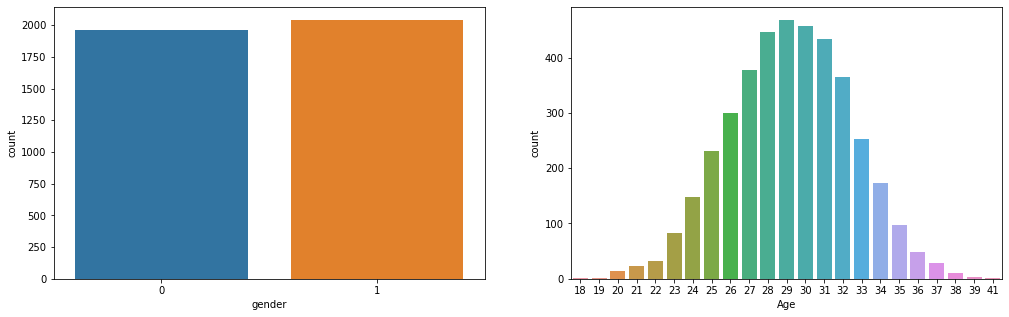

In [107]:
rcParams['figure.figsize'] = 17,5

fig, ax =plt.subplots(nrows=1, ncols=2)
sns.countplot(df['gender'], ax=ax[0])
sns.countplot(df['Age'], ax=ax[1])
fig.show()

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* фитнес-центр посещает приблизительно одинаковое количество мужчин и женщих. 


* есть небольшой перевес в сторону тех, кто отмечен 1.
    
    
* основная масса посетителей имеют возраст 23-36. 
    
    
* самая популярная аудитория - это люди, которым в районе 30 лет.

<ipython-input-108-d54dc139b8c9>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


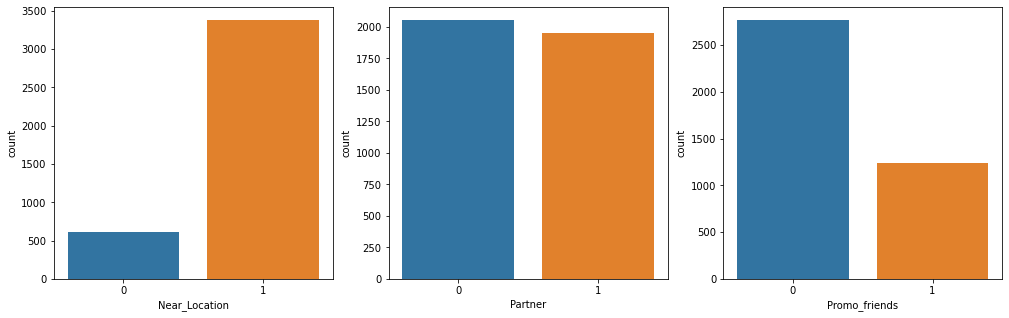

In [108]:
rcParams['figure.figsize'] = 17,5

fig, ax =plt.subplots(nrows=1, ncols=3)
sns.countplot(df['Near_Location'], ax=ax[0])
sns.countplot(df['Partner'], ax=ax[1])
sns.countplot(df['Promo_friends'], ax=ax[2])
fig.show()

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* основная масса клиентов проживает или работает в районе, где находится фитнес-центр.


* остальные, возможно, ходят по привычке (раньше рядом жили/работали, ходят к определенному инструктору, имеют скидку или что-то еще удерживает)
    
    
* количество клиентов, которые являются сотрудниками компаний-партнеров, приблизительно совпадает с количеством прочих клиентов.


* явного перекоса в какую-то сторону нет, хотя НЕ сотрудников компаний-партнеров чуть больше.
    
    
* клиентов, пришедших по промокоду в рамках акции "приведи друга" почти в 2 раза меньше.


* но все равно их достаточно много.

<ipython-input-109-12848778be00>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


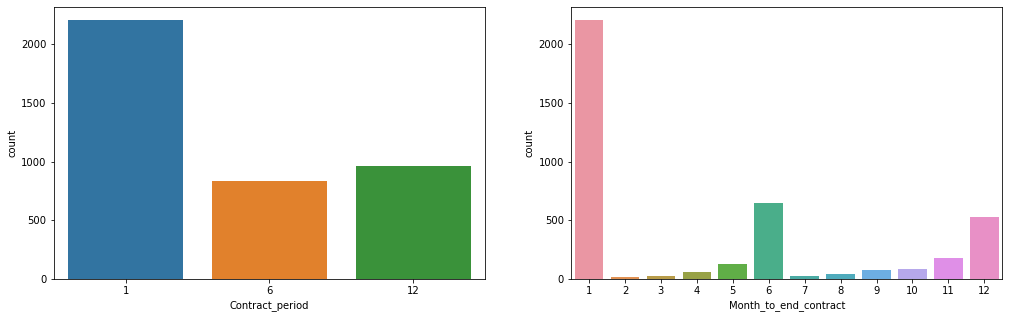

In [109]:
rcParams['figure.figsize'] = 17,5

fig, ax =plt.subplots(nrows=1, ncols=2)
sns.countplot(df['Contract_period'], ax=ax[0])
sns.countplot(df['Month_to_end_contract'], ax=ax[1])
fig.show()

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* большинство клиентов покупают месячные абонементы.


* клиентов, которые покупают абонементы на 6,12 мес. в сумме почти столько же.

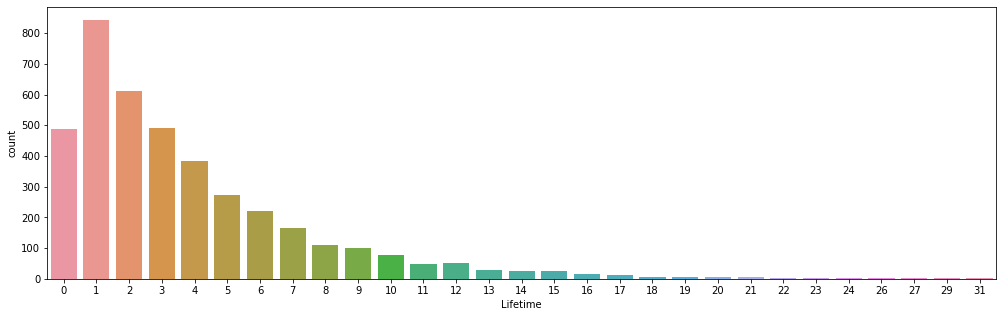

In [110]:
rcParams['figure.figsize'] = 17,5

sns.countplot(df['Lifetime'])

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* большинство клиентов имеют "время жизни" не более 1,5 года.


* при этом основная масса клиентов начала пользоваться услугами фитнес-центра несколько месяцев назад.
    
    
* довольно много новых клиентов, т.е. количество новых клиентов в ближайшие месяцы расло.

<ipython-input-111-61cb6d44f106>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


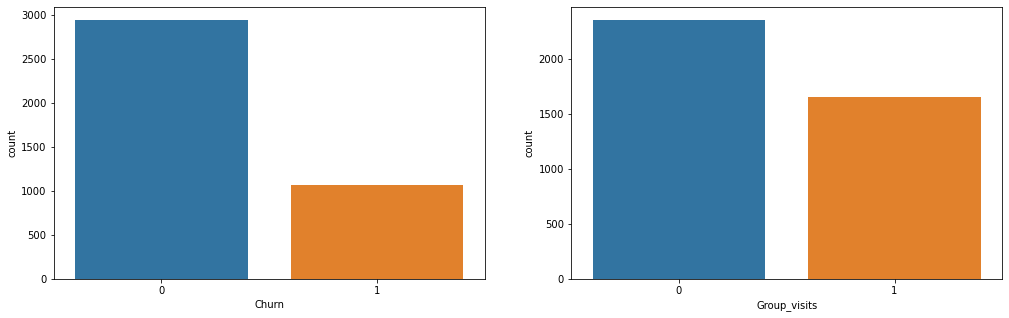

In [111]:
rcParams['figure.figsize'] = 17,5

fig, ax = plt.subplots(nrows=1, ncols=2)
sns.countplot(df['Churn'], ax=ax[0])
sns.countplot(df['Group_visits'], ax=ax[1])
fig.show()

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>
    
    
* отвалившихся клиентов приблизительно в 3 раза меньже, чем удержавшихся. Довольно много отвалившихся, но это скорее всего нормальная тенденция - люди быстро перегорают.
    
    
* довольно много клиентов посещает групповые занятия.

## Изучение корреляций

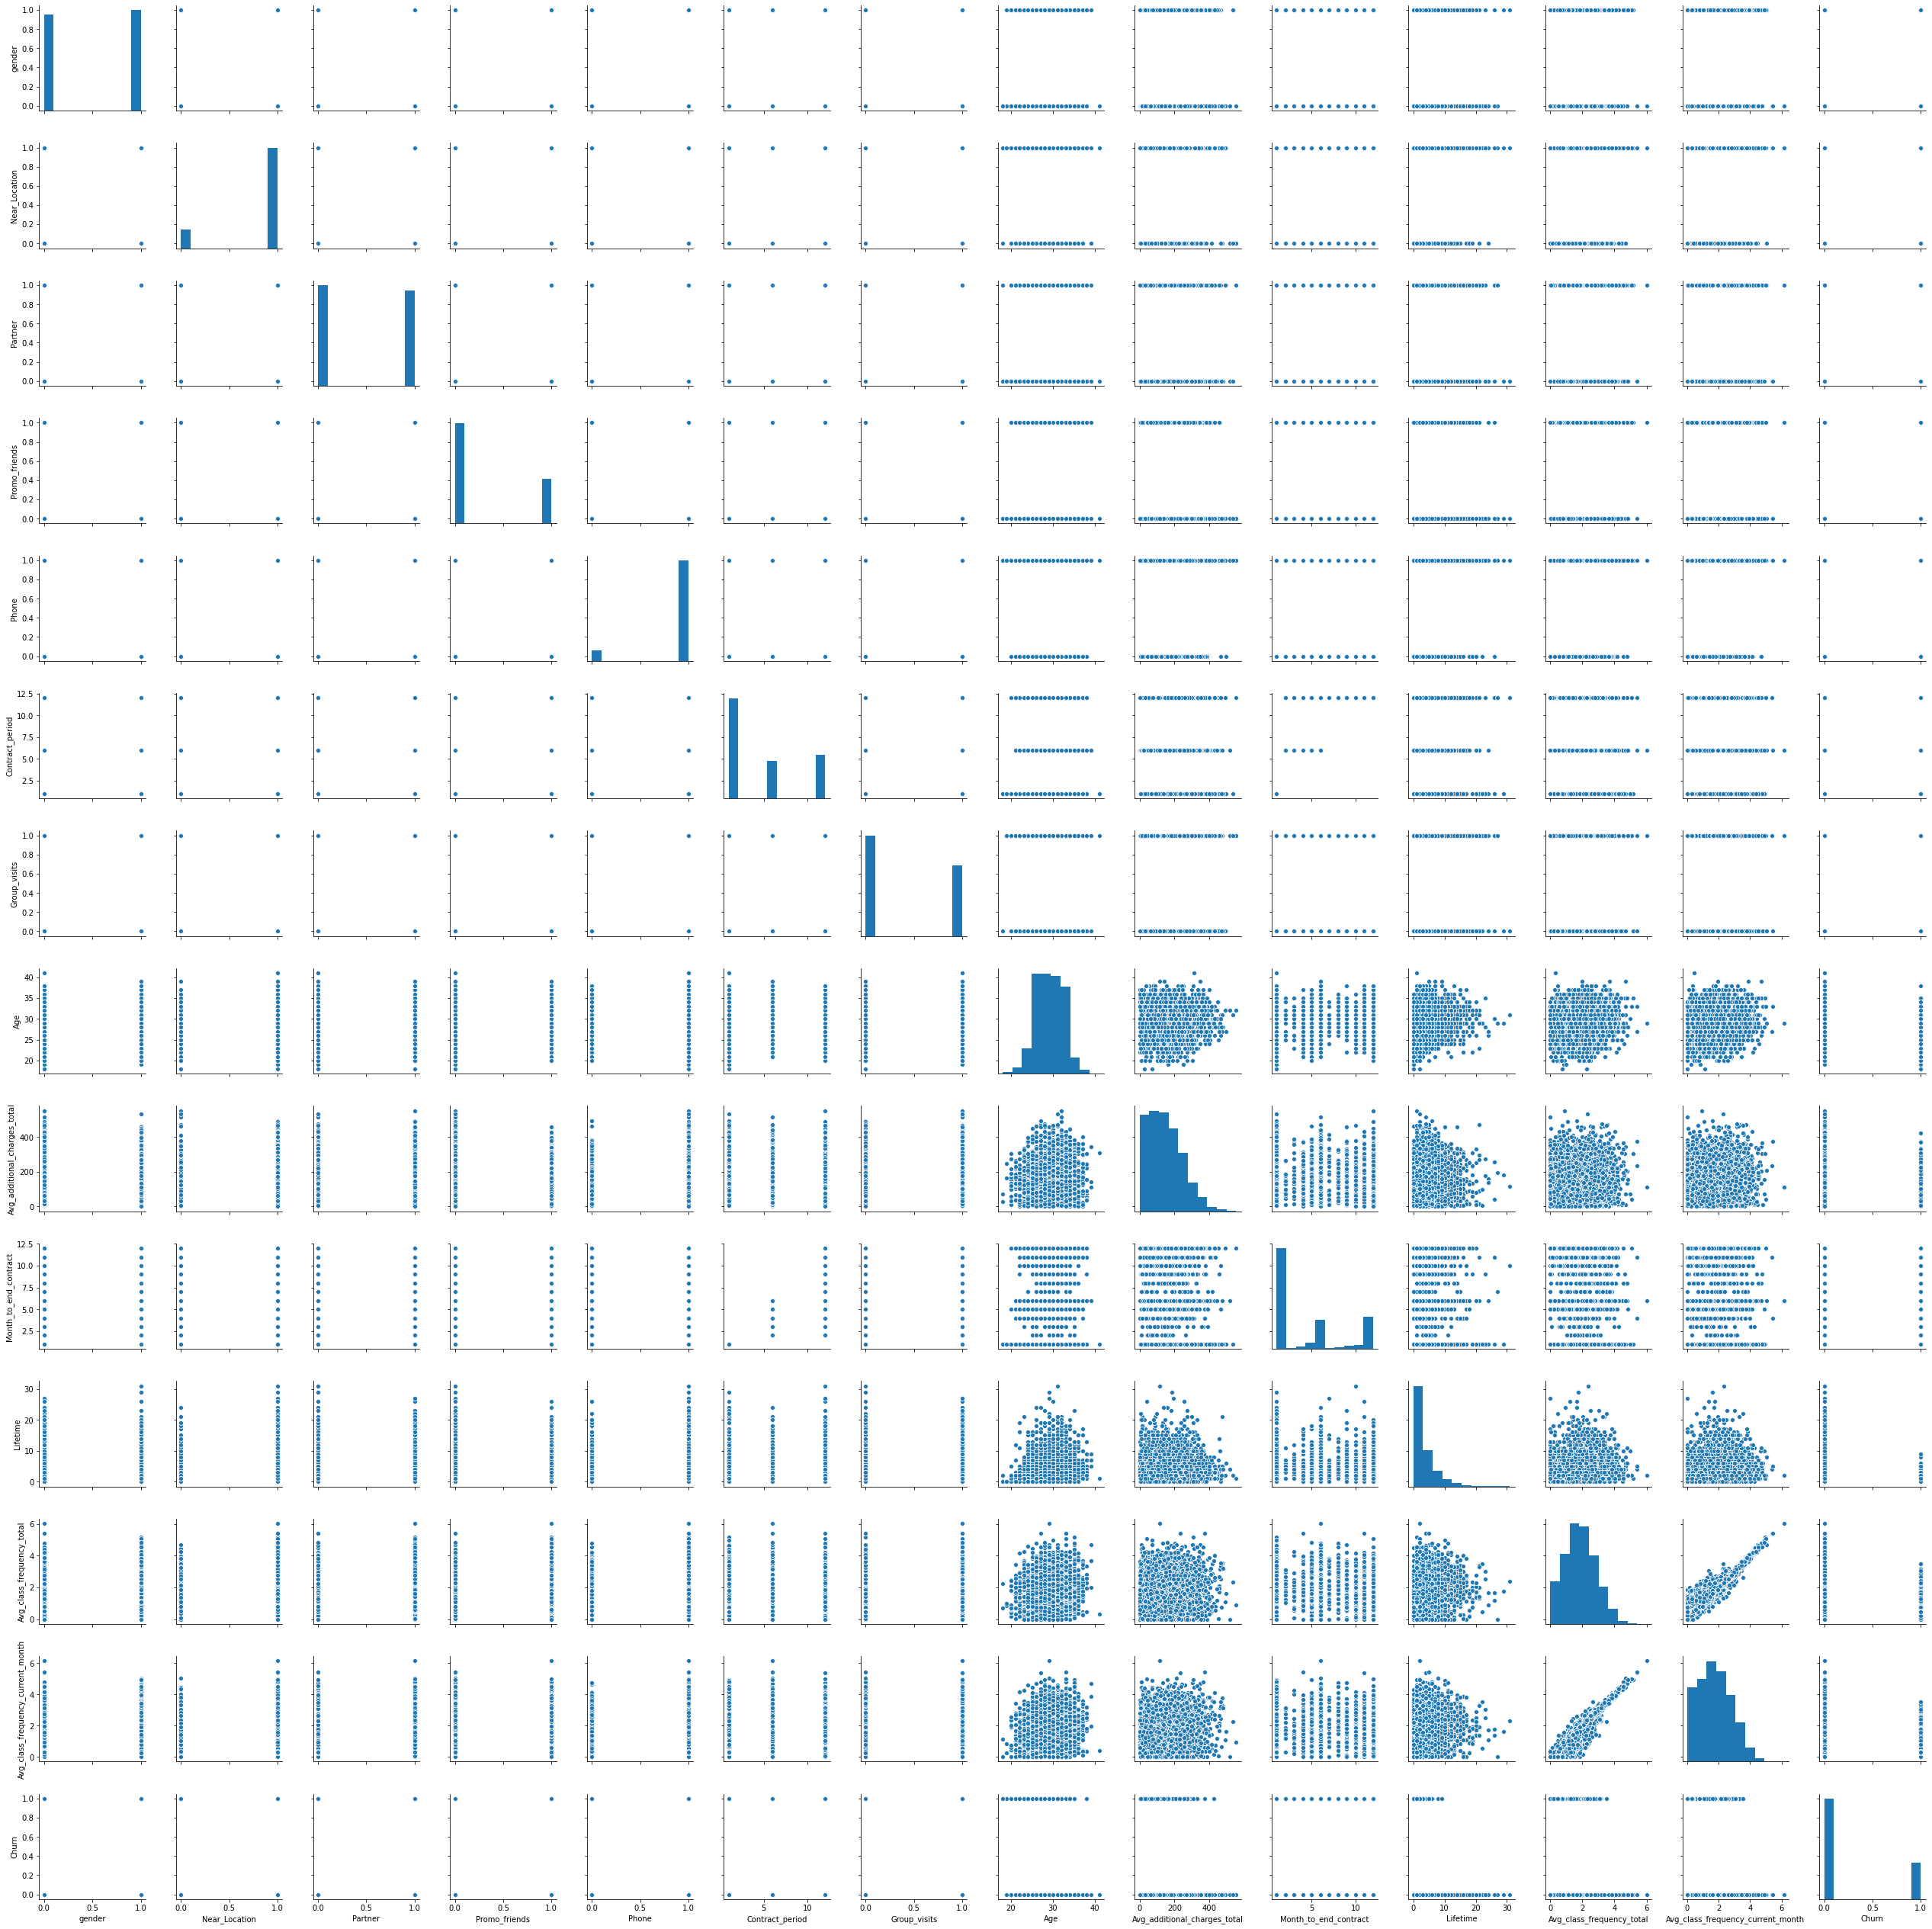

In [112]:
sns.pairplot(df)

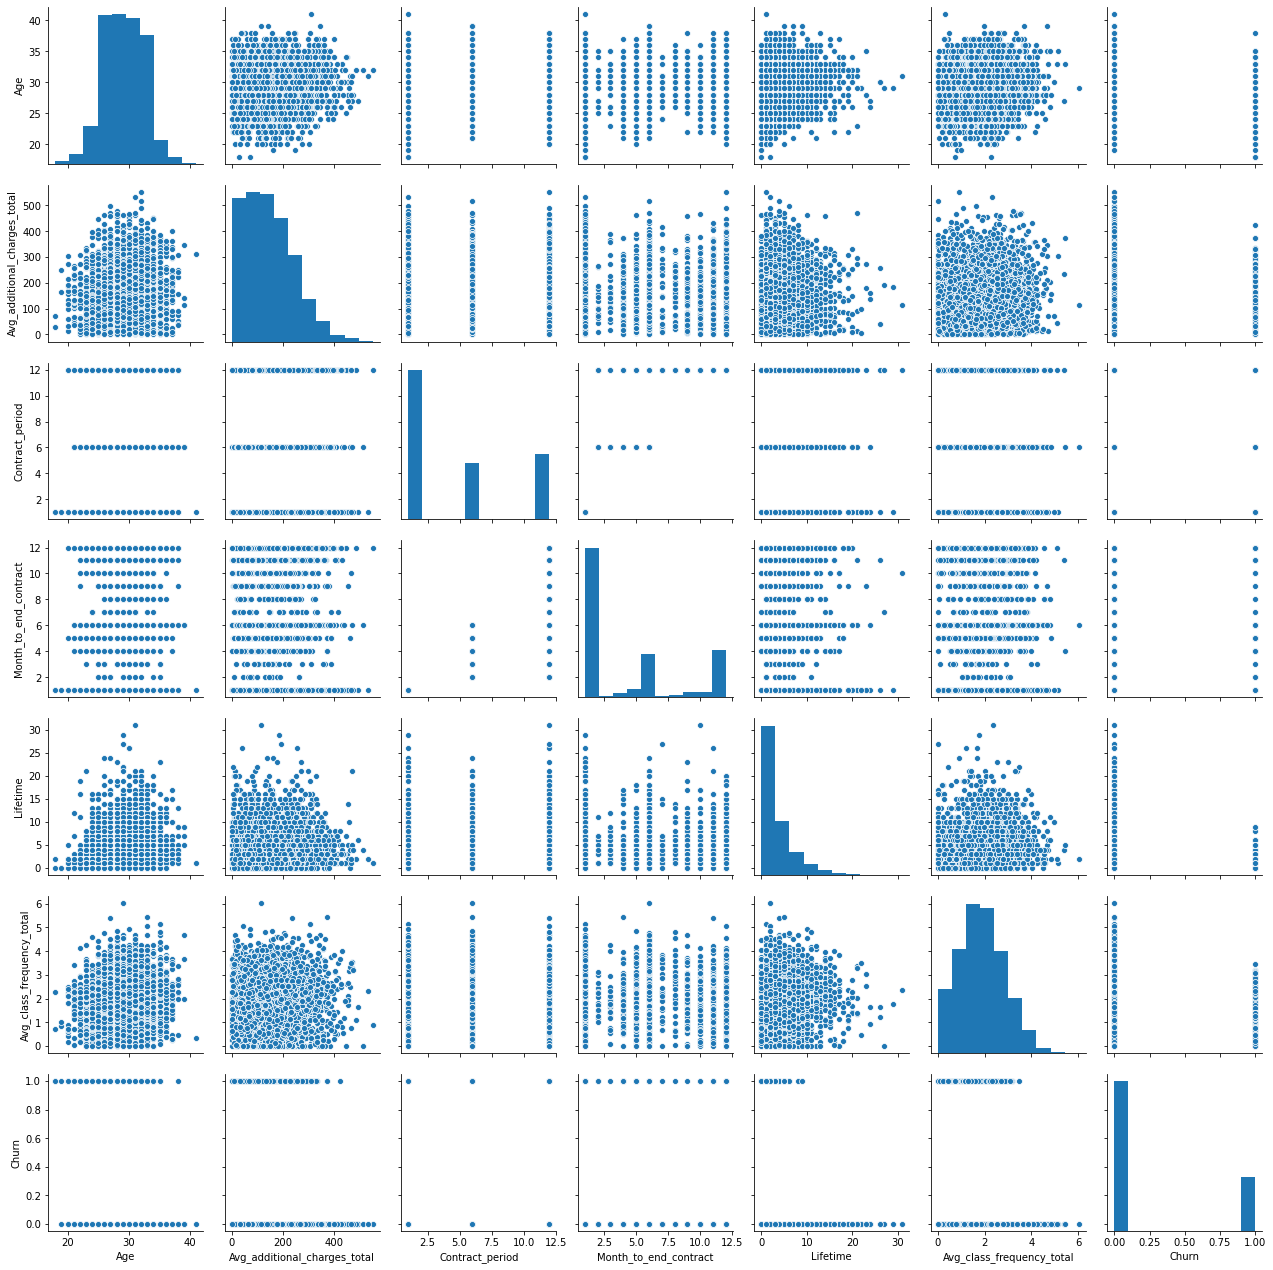

In [113]:
sns.pairplot(df[['Age',
                 'Avg_additional_charges_total',
                 'Contract_period',
                 'Month_to_end_contract', 
                 'Lifetime',
                 'Avg_class_frequency_total', 
                 'Churn']])

***Визуализация взаимосвязей по каждой отдельной переменной***

***Визуализация взаимосвязей по переменной Age***

<ipython-input-114-1f2deab285ef>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-114-1f2deab285ef>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-114-1f2deab285ef>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-114-1f2deab285ef>:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


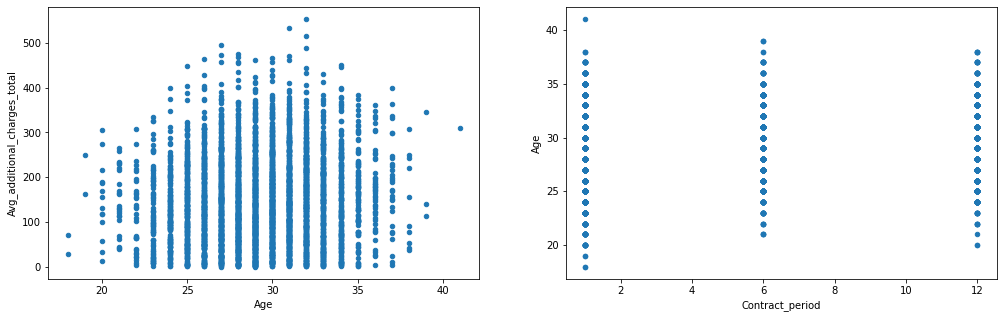

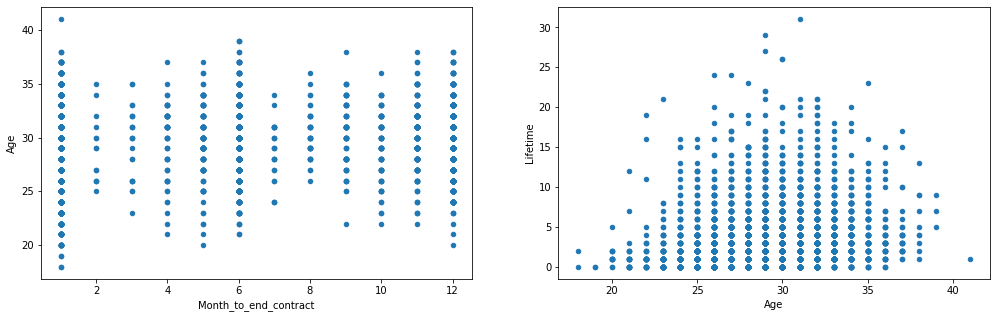

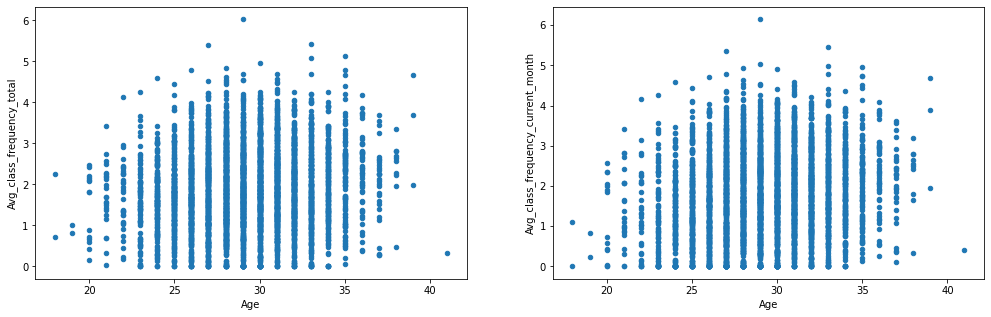

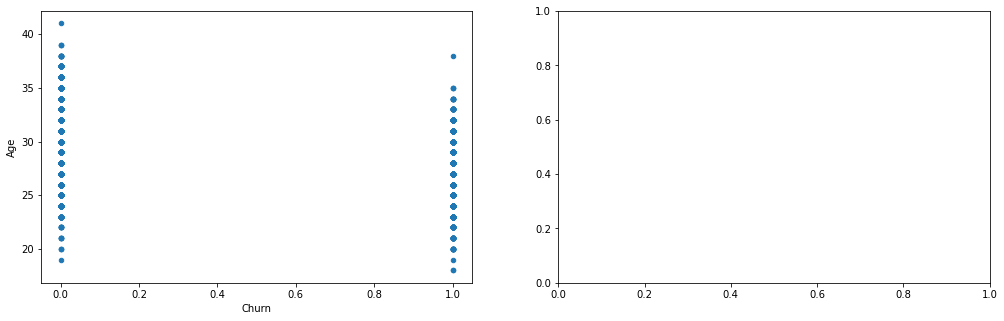

In [114]:
rcParams['figure.figsize'] = 17,5

fig, ax = plt.subplots(nrows=1, ncols=2)
df[['Age', 'Avg_additional_charges_total']].plot(kind='scatter', 
                                                 x='Age', 
                                                 y='Avg_additional_charges_total', 
                                                 ax=ax[0])
df[['Age', 'Contract_period']].plot(kind='scatter', 
                                                 x='Contract_period', 
                                                 y='Age', 
                                                 ax=ax[1])
fig.show()

fig, ax = plt.subplots(nrows=1, ncols=2)
df[['Age', 'Month_to_end_contract']].plot(kind='scatter', 
                                                 x='Month_to_end_contract', 
                                                 y='Age', 
                                                 ax=ax[0])
df[['Age', 'Lifetime']].plot(kind='scatter', 
                                                 x='Age', 
                                                 y='Lifetime', 
                                                 ax=ax[1])
fig.show()

fig, ax = plt.subplots(nrows=1, ncols=2)
df[['Age', 'Avg_class_frequency_total']].plot(kind='scatter', 
                                                 x='Age', 
                                                 y='Avg_class_frequency_total', 
                                                 ax=ax[0])
df[['Age', 'Avg_class_frequency_current_month']].plot(kind='scatter', 
                                                 x='Age', 
                                                 y='Avg_class_frequency_current_month', 
                                                 ax=ax[1])
fig.show()

fig, ax = plt.subplots(nrows=1, ncols=2)
df[['Age', 'Churn']].plot(kind='scatter', 
                                                 x='Churn', 
                                                 y='Age', 
                                                 ax=ax[0])
fig.show()

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>
    
    
* распределение выручки от прочих услуг фитнес-центра по возрастам клиентов - можно сделать вывод, что прибыль от клиентов возрастом до 23 лет и после 35 меньше. Причины могут быть разные - данные возрастные категории менее платежеспособны или мнее заинтересованы в получении прочих услуг, либо не все прочите услуги подходят (оринтированы) клиентам из данных возрастных категорий. Также среди клиентов 23-35 клиенты возрастом около 30 чаще генерят большую прибыть от прочих услуг.
    
    
* распределение продолжительности абонемента по возрастам - клиенты возрастом до 20 лет приобретают только абонементы на 1 месяц. Это, скорее всего, связано с тем, что абонементы они покупают сами (не получают в рамках соц.пакета компании работадателя). И с финансовой точки зрения молодым людям проще платить каждый месяц небольшую сумму, чем покупать абонемент на 6, 12 мес. (хотя абонементы на 6, 12 мес. обычно выгоднее).
    
    
* распределение количества месяцев до окончания абонемента по возрастам - клиенты возрастом около 30 более постоянно посещают фитнес цент на протяжении периода действия абонемента. Клиенты возрастом 18-25 и 35+ с каждым последующим месяцем реже посещают фитнес-центр (ленятся, либо перегорают). 
    
    
* распределение Lifetime по возрастам - если смотреть в разрезе возраста, то категория клиентов 24-36 имеют выше показатель Lifetime. Клиенты с самым высоким Lifetime (25+ месяцев) - имеют возраст 30-32.
    
    
* распределение средней посещаемости по возрастам - основное ядро клиентов сосредоточено в возрастной категории 23-36, они составляют основную массу посетителей. При этом наиболее активные посетители (посещают фитнес-центр в среднем 4+ раза в неделю) имеют возраст около 30.
    
    
* факт оттока клиентов по возрастам - среди "отвалившихся" клиентов есть есть самые молодые (18) и практически нет клиентов 35+.

***Визуализация матрицы корреляций по переменным***

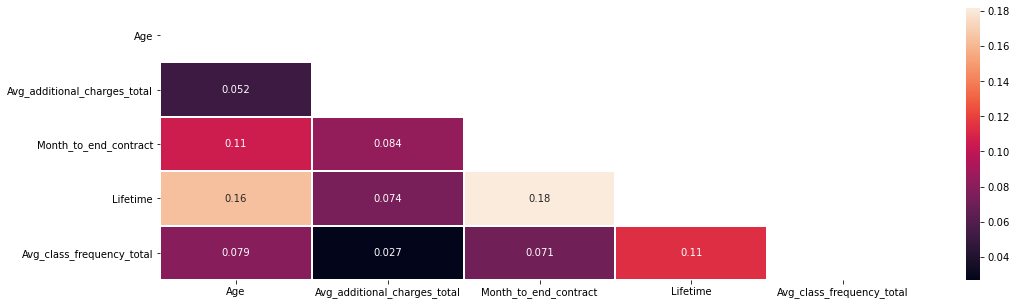

In [115]:
# Рассчитаем и визуализируем корреляционную матрицу для переменных.

# Уберем из данных переменную 'Churn' — факт оттока в текущем месяце. 
# Здесь нет смысла считать корреляцию. Поскольку одна переменная принимает только одно из двух значений. 
# Получается данные нужно разбить на 2 набора и изучать по-отдельности. 
# Но тогда в каждом наборе одна из переменных константа и корреляции нет.
# По аналогичной причине уберем из данных переменные Contract_period и другие переменные, которые принимаю только пару значений

# Используем метод Кендела, поскольку многие переменные являются НЕ непрерывными (ранговыми).

age = np.triu(df[['Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total']].corr(method='kendall'))

sns.heatmap(df[['Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total']].corr(method='kendall'), 
            annot=True, 
            mask=age,
            linewidths=1, 
            linecolor='white')

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* наблюдается очень слабая положительная взаимосвязь между Lifetime и Age, Lifetime и Month_to_end_contract

***Стат.проверка гипотез на равенство средних в разрезе переменной Churn***

***Предварительно изучим категориальные характеристики клиентов ('gender', 'Near_Location', 'Partner', 'Promo_friends',  'Phone', 'Group_visits') разрезе группы оттока (Churn) и визуализируем разницы средних значенпй по каждой характеристике.***

***Для этого сгруппируем данные по оттоку (Churn) и посчитаем среднее по каждой бинарной величине (категориальной характеристике). Затем преобразуем полученные данные и визуализируем. В итоге визуально будет понятно, по каким категориальным характеристикам может быть значимая разница в средних значениях для ушедших/оставшихся клиентов.***

***Например, среднее значение по категории near_location для ушедших клиентов = 0.5 значит ушло одинаковое количество людей, которые живут далеко и близко от фитнес-центра. Если же среднее значение по категории near_location для ушедших клиентов = 0.75 значит чаще уходят те клиенты, которые живут близко от фитнес-центра (т.е. ушедшие клиенты (near_location=1) составляют 75% всех ушедших). Аналогично для других категориальных характеристик.***

In [116]:
data_= df[['gender', 
          'Near_Location', 
          'Partner', 
          'Promo_friends',  
          'Phone',
          'Group_visits', 
          'Churn']]

labels=['остались', 'ушли']
data_['Churn'] = data_['Churn'].map(dict(zip(range(0,2), labels)))

# data_.groupby('Churn').mean().unstack().reset_index()

data_

<ipython-input-116-a943a90d2c2f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['Churn'] = data_['Churn'].map(dict(zip(range(0,2), labels)))


,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Churn
0,1,1,1,1,0,1,остались
1,0,1,0,0,1,1,остались
2,0,1,1,0,1,0,остались
3,0,1,1,1,1,1,остались
4,1,1,1,1,1,0,остались
...,...,...,...,...,...,...,...
3995,1,1,1,0,1,0,остались
3996,0,1,0,0,1,1,ушли
3997,1,1,1,1,1,0,остались
3998,0,1,1,1,1,0,остались


Text(0, 0.5, 'mean_value')

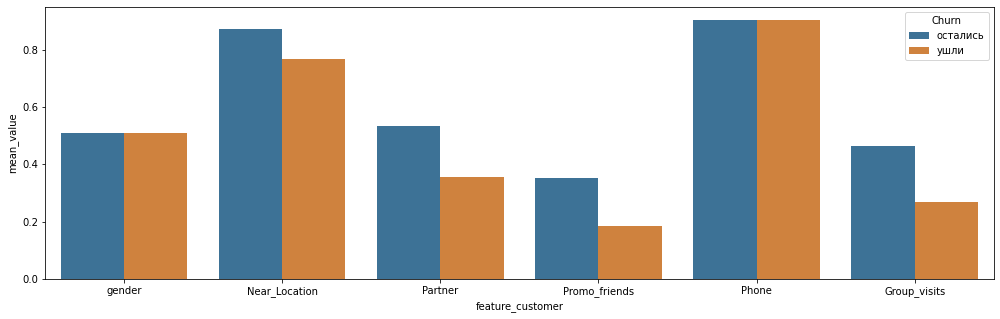

In [117]:
ax = sns.barplot(data=data_.groupby('Churn').mean().unstack().reset_index(), 
            x='level_0', 
            y=0, 
            hue='Churn', 
            saturation=.6)

ax.set_xlabel('feature_customer')
ax.set_ylabel('mean_value')

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* gender - существенной разницы в средних нет. Среди ушедших приблизительно одинаковое количество мужчин и женщих. Среди оставшихся также приблизительно одинаковое количество мужчин и женщих.


* Near_Location - среди оставшихся клиентов большинство проживает вблизи фитнес-центра. При этом среди ушедших клиентов большинство также проживает вблизи фитнес-центра. Т.е. проживание клиента НЕ в районе фитнес-центра, скорее всего, не является основной причиной ухода. Хотя в среднем чаще остаются клиенты, которые живут вблизи фитнес-центра.



* Partner - среди оставшихся, приблизительно поровну клиентов которые являются и НЕ являются сотрудниками компаний партнеров фитнес-центра. При этом среди ушедших клиентов большинство НЕ являлись сотрудниками компаний партнеров фитнес-центра. Т.е. статус "сотрудник компании партнера" способствует удержанию клиента. Скорее всего, сотрудники компаний партнеров имеют какие-то бонусы и льготы.


 
* Promo_friends - среди оставшихся, большинство клиентов НЕ использовали промокод при первой регистрации. При этом среди ушедших клиентов большинство также НЕ использовали промокод. Т.е. наличие промокода, скорее всего, мотвирует клиента посетить фитнес-центр, но НЕ способствует удержанию клиента. 


  
* Phone - существенной разницы в средних нет. Среди ушедших и оставшихся клиентов подавляющее большинство указывали свой номер телефона.



* Group_visits - среди оставшихся, большинство (чуть больше половины) клиентов НЕ посещали групповые занятия. При этом среди ушедших клиентов большинство также НЕ посещали групповые занятия. Т.е. нельзя утверждать, что групповые занятия способствуют удержанию клиента. 

***Далее визуализируем и изучим непрерывные характеристики клиентов (Age, Avg_additional_charges_total, Month_to_end_contract, Lifetime, Avg_class_frequency_total, Avg_class_frequency_current_month) разрезе группы оттока (Churn)***

In [118]:
data_= df[['Age', 
           'Avg_additional_charges_total', 
           'Contract_period',
           'Month_to_end_contract', 
           'Lifetime', 
           'Avg_class_frequency_total', 
           'Avg_class_frequency_current_month',
           'Churn']].round(1)

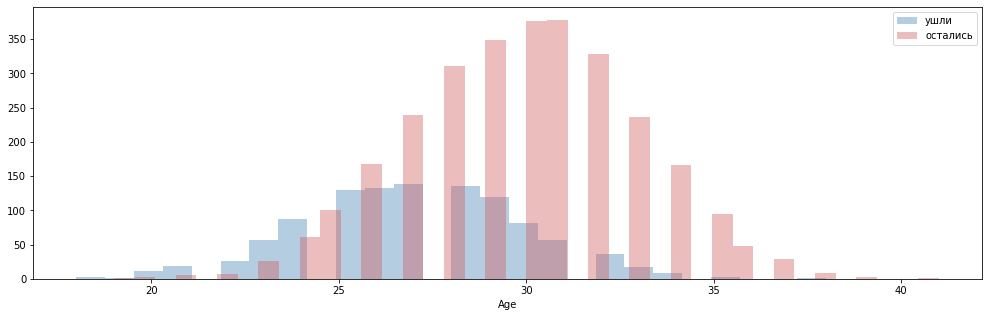

In [119]:
col='Age'

churn_1 = data_[[col,'Churn']].loc[data_['Churn'] == 1]
churn_0 = data_[[col,'Churn']].loc[data_['Churn'] == 0]
    
ax = sns.distplot(churn_1[col], color='SteelBlue', kde=False, label='ушли')
ax = sns.distplot(churn_0[col], color='IndianRed', kde=False, label='остались')
plt.legend()
plt.show()

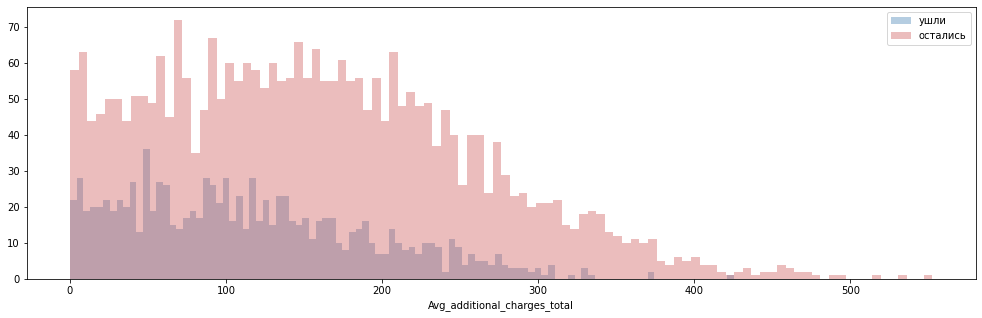

In [120]:
col='Avg_additional_charges_total'

churn_1 = data_[[col,'Churn']].loc[data_['Churn'] == 1]
churn_0 = data_[[col,'Churn']].loc[data_['Churn'] == 0]
    
ax = sns.distplot(churn_1[col], color='SteelBlue', kde=False, label='ушли', bins=100)
ax = sns.distplot(churn_0[col], color='IndianRed', kde=False, label='остались', bins=100)
plt.legend()
plt.show()

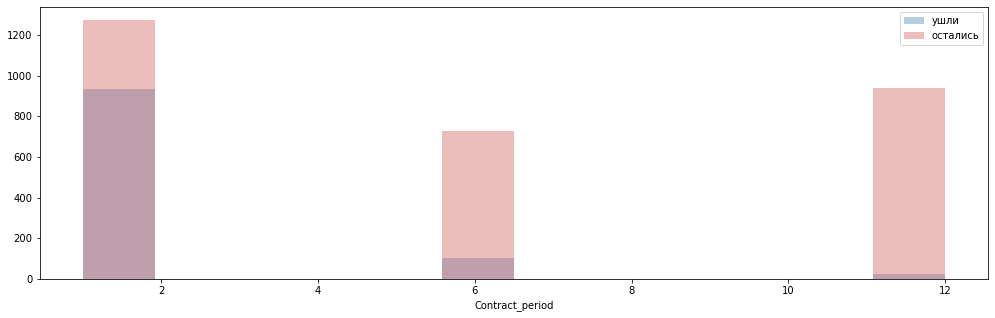

In [121]:
col='Contract_period'

churn_1 = data_[[col,'Churn']].loc[data_['Churn'] == 1]
churn_0 = data_[[col,'Churn']].loc[data_['Churn'] == 0]
    
ax = sns.distplot(churn_1[col], color='SteelBlue', kde=False, label='ушли', bins=12)
ax = sns.distplot(churn_0[col], color='IndianRed', kde=False, label='остались', bins=12)
plt.legend()
plt.show()

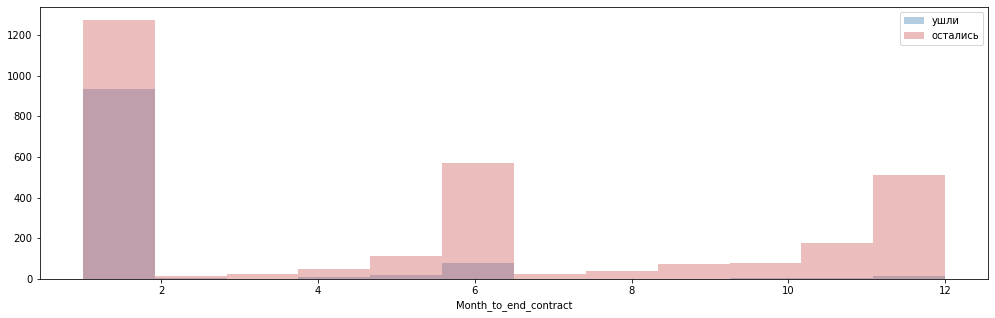

In [122]:
col='Month_to_end_contract'

churn_1 = data_[[col,'Churn']].loc[data_['Churn'] == 1]
churn_0 = data_[[col,'Churn']].loc[data_['Churn'] == 0]
    
ax = sns.distplot(churn_1[col], color='SteelBlue', kde=False, label='ушли', bins=12)
ax = sns.distplot(churn_0[col], color='IndianRed', kde=False, label='остались', bins=12)
plt.legend()
plt.show()

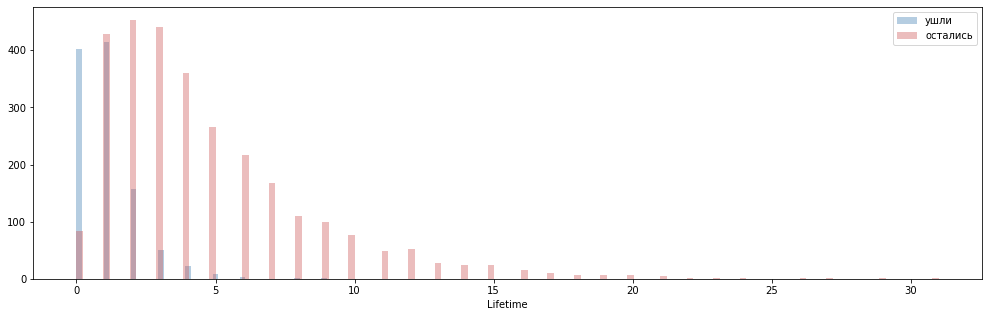

In [123]:
col='Lifetime'

churn_1 = data_[[col,'Churn']].loc[data_['Churn'] == 1]
churn_0 = data_[[col,'Churn']].loc[data_['Churn'] == 0]
    
ax = sns.distplot(churn_1[col], color='SteelBlue', kde=False, label='ушли')
ax = sns.distplot(churn_0[col], color='IndianRed', kde=False, label='остались', bins=130)
plt.legend()
plt.show()

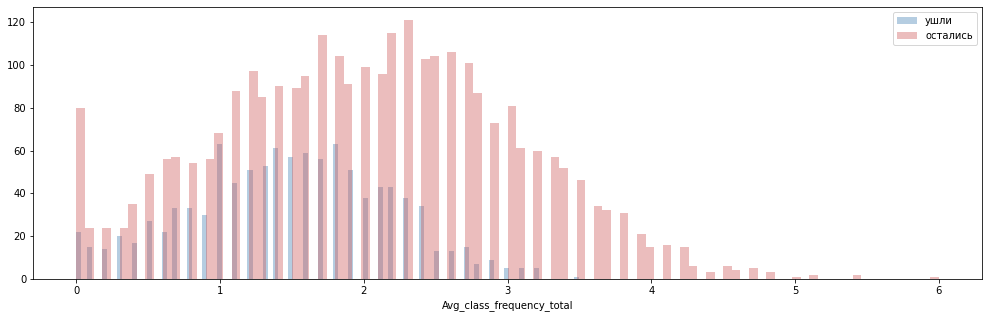

In [124]:
col='Avg_class_frequency_total'

churn_1 = data_[[col,'Churn']].loc[data_['Churn'] == 1]
churn_0 = data_[[col,'Churn']].loc[data_['Churn'] == 0]
    
ax = sns.distplot(churn_1[col], color='SteelBlue', kde=False, label='ушли', bins=100)
ax = sns.distplot(churn_0[col], color='IndianRed', kde=False, label='остались', bins=100)
plt.legend()
plt.show()

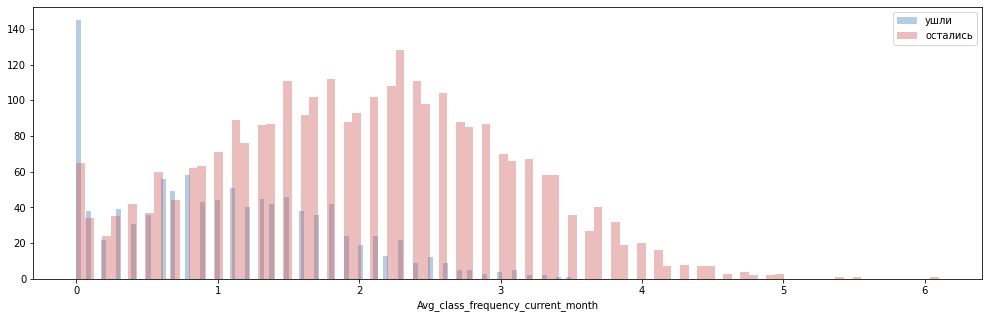

In [125]:
col='Avg_class_frequency_current_month'

churn_1 = data_[[col,'Churn']].loc[data_['Churn'] == 1]
churn_0 = data_[[col,'Churn']].loc[data_['Churn'] == 0]
    
ax = sns.distplot(churn_1[col], color='SteelBlue', kde=False, label='ушли', bins=100)
ax = sns.distplot(churn_0[col], color='IndianRed', kde=False, label='остались', bins=100)
plt.legend()
plt.show()

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* Age - распределение по возрастам среди оставшихся клиентов смещено вправо (в сторону более высокого возраста) по сравнению с распределением возрастов ушедших клиентов. Т.е. оставшиеся клиенты это более взрослые люди.
    
    
* Avg_additional_charges_total - распределение по суммарной выручке от прочих услуг для ушедших/оставшихся клиентов в целом совпадает. Однако у оставшихся клиентов на графике более выражен "хвост" справа, т.е. клиенты, которые суммарно потратили больше всего денег на прочие услуги, в итоге остались.
    
    
* Contract_period/Month_to_end_contract - клиенты, которые остаются заметно чаще приобретают абонементы на 6, 12 мес. Т.е. можно предположить, что клиенты, купившие абонементы на 6, 12 мес. скорее останутся.
    
    
     
* Lifetime - среди новичков (у кого Lifetime=0) намного больше клиентов, которые в итоге ушли. На отметке Lifetime=1 количество оставшихся и ушедших клиентов приблизительно одинаково, чуть больше оставшихся. Далее количество ушедних клиентов начиная с Lifetime=2 стремительно падает. Количество оставшихся клиентов также падает (но более плавно) начиная с Lifetime=3. Т.е. подавляющее большинство ушедших клиентов уходит в первый же месяц. Можно предположить, что если клиент продержался более 1 месяца (не ушел сразу), то его Lifetime растягивается.
    
     
* Avg_class_frequency_total - распределение по средней общей посещаемости среди оставшихся клиентов смещено вправо (в сторону более частой средней посещаемости) по сравнению с распределением средней общей посещаемости ушедших клиентов. Т.е. клиенты, которые посещают фитнес-центр в общем чаще 1,5 раза в неделю задерживаются на дольше. Также именно среди оставшихся клиентов есть самые частые посетители (посещают в общем более 3,5 раз в неделю).
    
     
* Avg_class_frequency_current_month  - среди клиентов, которые имеют нулевую посещаемость в последний месяц гораздо больше тех, кто в итоге ушел. Т.е., если клиент в последний месяц показывает нулевую посещаемость, высока вероятность его ухода.   
    

***Выполним стат.проверку гипотез на равенство средних значений по переменным:***

- 'Age',
- 'Avg_additional_charges_total', 
- 'Month_to_end_contract',
- 'Lifetime',
- 'Avg_class_frequency_total',
- 'Avg_class_frequency_current_month' 

***в разрезе данных по оттоку клиентов. И ответим на вопросы:***

- есть ли значимая разница в среднем возрасте для отвалившихся и удержавшихся клиентов?
- есть ли значимая разница в средней сумме трат на прочие услуги для отвалившихся и удержавшихся клиентов?
- есть ли значимая разница в среднем количестве месяцев до окончания действия абонемента для отвалившихся и удержавшихся клиентов?
- есть ли значимая разница в среднем Lifetime для отвалившихся и удержавшихся клиентов?
- есть ли значимая разница в средней общей посещаемости для отвалившихся и удержавшихся клиентов?
- есть ли значимая разница в средней посещаемости за последний месяц для отвалившихся и удержавшихся клиентов?
    
***Для этого по каждому вопросу сформулируем нулевую и альтернативную гипотезы, например:***

- H0: средний возраст клиентов, для которых зафиксирован (Churn=1) и не зафиксирован (Churn=0) факт оттока совпадает 
- H1: средний возраст клиентов, для которых зафиксирован (Churn=1) и не зафиксирован (Churn=0) факт оттока НЕ совпадает 

***Поскольку в данном тесте цена ошибки не велика, зададим пороговый уровень статистической значимости alpha = 0.05.***

***Будем проводить двухвыборочный двухсторонний тест, поскольку у нас есть две независимые выборки.***

In [126]:
from scipy import stats as st
from termcolor import colored


alpha = 0.05

df_ = df[['Age',
    'Avg_additional_charges_total', 
    'Month_to_end_contract',
    'Lifetime',
    'Avg_class_frequency_total',
    'Avg_class_frequency_current_month']]

for col in df_.columns:
    print(colored('Cформулируем нулевую и альтернативную гипотезы для данных по столбцу '+col+':', attrs=['bold']))
    print()
    print('H0: средний '+col+' клиентов, для которых зафиксирован (Churn=1) и не зафиксирован (Churn=0) факт оттока совпадает')
    print('H1: средний '+col+' клиентов, для которых зафиксирован (Churn=1) и не зафиксирован (Churn=0) факт оттока НЕ совпадает')
    print()
    
    churn_1 = df[col].loc[df['Churn'] == 1]
    churn_0 = df[col].loc[df['Churn'] == 0]
    
    result = st.ttest_ind(churn_1, churn_0, equal_var=False)
    print(result)
    print()

    if (result.pvalue < alpha):
        print(colored('Отвергаем нулевую гипотезу.', attrs=['bold']))
    else:
        print(colored('Не отвергаем нулевую гипотезу ', attrs=['bold']))
    print('--------------------------------------------------------------------------------------------------------')
    print()

Cформулируем нулевую и альтернативную гипотезы для данных по столбцу Age:

H0: средний Age клиентов, для которых зафиксирован (Churn=1) и не зафиксирован (Churn=0) факт оттока совпадает
H1: средний Age клиентов, для которых зафиксирован (Churn=1) и не зафиксирован (Churn=0) факт оттока НЕ совпадает

Ttest_indResult(statistic=-28.5013785190484, pvalue=1.4384150241611314e-149)

Отвергаем нулевую гипотезу.
--------------------------------------------------------------------------------------------------------

Cформулируем нулевую и альтернативную гипотезы для данных по столбцу Avg_additional_charges_total:

H0: средний Avg_additional_charges_total клиентов, для которых зафиксирован (Churn=1) и не зафиксирован (Churn=0) факт оттока совпадает
H1: средний Avg_additional_charges_total клиентов, для которых зафиксирован (Churn=1) и не зафиксирован (Churn=0) факт оттока НЕ совпадает

Ttest_indResult(statistic=-14.391490981437457, pvalue=4.2304727705833696e-45)

Отвергаем нулевую гипотезу.
----

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>
   
- есть ли значимая разница в среднем возрасте для отвалившихся и удержавшихся клиентов?
    - cредний возраст клиентов, для которых зафиксирован (Churn=1) и не зафиксирован (Churn=0) факт оттока, НЕ совпадает, поскольку значение p-value больше заданного порогового уровеня статистической значимости alpha = 0.05
    - при этом отрицательное значение t-статистики с достаточно большим абсолютным значением (statistic=-28.5013785190484) говорит о том, что средний возраст клиентов для которых зафиксирован (Churn=1) факт оттока существенно ниже чем у клиентов, у которых не был зафиксирован (Churn=0) факт оттока.
    
    
- есть ли значимая разница в средней сумме трат на прочие услуги для отвалившихся и удержавшихся клиентов?
    - средние траты на прочие услуги клиентов, для которых зафиксирован (Churn=1) и не зафиксирован (Churn=0) факт оттока, НЕ совпадает, поскольку значение p-value больше заданного порогового уровеня статистической значимости alpha = 0.05
    - при этом отрицательное значение t-статистики с достаточно большим абсолютным значением (statistic=-14.391490981437457) говорит о том, что средние траты на прочие услуги клиентов для которых зафиксирован (Churn=1) факт оттока существенно ниже чем у клиентов, у которых не был зафиксирован (Churn=0) факт оттока.
 
    
- есть ли значимая разница в среднем количестве месяцев до окончания действия абонемента для отвалившихся и удержавшихся клиентов?
    - в среднем количество месяцев до окончания действия абонемента  у клиентов, для которых зафиксирован (Churn=1) и не зафиксирован (Churn=0) факт оттока, НЕ совпадает, поскольку значение p-value больше заданного порогового уровеня статистической значимости alpha = 0.05
    - при этом отрицательное значение t-статистики с достаточно большим абсолютным значением (statistic=-35.99648164453316) говорит о том, что среднее количество месяцев до окончания действия абонемента у клиентов для которых зафиксирован (Churn=1) факт оттока существенно ниже чем у клиентов, у которых не был зафиксирован (Churn=0) факт оттока.
 
    
- есть ли значимая разница в среднем Lifetime для отвалившихся и удержавшихся клиентов?
    - cредний Lifetime клиентов, для которых зафиксирован (Churn=1) и не зафиксирован (Churn=0) факт оттока, НЕ совпадает, поскольку значение p-value больше заданного порогового уровеня статистической значимости alpha = 0.05
    - при этом отрицательное значение t-статистики с достаточно большим абсолютным значением (statistic=-46.98971567416262) говорит о том, что средний Lifetime клиентов для которых зафиксирован (Churn=1) факт оттока существенно ниже чем у клиентов, у которых не был зафиксирован (Churn=0) факт оттока.
 
    
- есть ли значимая разница в средней общей посещаемости для отвалившихся и удержавшихся клиентов?
    - средняя общая посещаемость клиентов, для которых зафиксирован (Churn=1) и не зафиксирован (Churn=0) факт оттока, НЕ совпадает, поскольку значение p-value больше заданного порогового уровеня статистической значимости alpha = 0.05
    - при этом отрицательное значение t-статистики с достаточно большим абсолютным значением (statistic=-19.367540130659975) говорит о том, что средняя общая посещаемость клиентов для которых зафиксирован (Churn=1) факт оттока существенно ниже чем у клиентов, у которых не был зафиксирован (Churn=0) факт оттока.
 
    
- есть ли значимая разница в средней посещаемости за последний месяц для отвалившихся и удержавшихся клиентов? 
    - средняя посещаемость за последний месяц клиентов, для которых зафиксирован (Churn=1) и не зафиксирован (Churn=0) факт оттока, НЕ совпадает, поскольку значение p-value больше заданного порогового уровеня статистической значимости alpha = 0.05
    - при этом отрицательное значение t-статистики с достаточно большим абсолютным значением (statistic=-32.55337244329963) говорит о том, что средняя посещаемость за последний месяц клиентов для которых зафиксирован (Churn=1) факт оттока существенно ниже чем у клиентов, у которых не был зафиксирован (Churn=0) факт оттока.   



<font color="Brown"><font size="4"><strong><em><u>То есть:</u></em></strong></font></font>

* Age - в среднем чаще факт оттока наблюдается среди более молодых клиентов возрастом до 27. Клиенты более старшего возраста ±30 более постоянны.
    
    
* Avg_additional_charges_total - средний чек от прочик услуг фитнес-центра выше среди клиентов, для которых не был зафиксирован факт оттока.
    
    
* Month_to_end_contract - клиенты, для которых не был зафиксирован факт оттока, в среднем чаще покупают абонементы сроком более 1 месяца. Поэтому количество месяцев до окончания срока действия абонемента для таких клиентов в среднем больше.
    
    
* Lifetime - время жизни среди клиентов, для которых не был зафиксирован факт оттока, в среднем выше.
    
    
* Avg_class_frequency_total|Avg_class_frequency_current_month - средняя посещаемость фитнес-центра среди клиентов, для которых не был зафиксирован факт оттока, в среднем выше. При этом в двух категориях клиентов (Churt=0|Churn=1) чаще встречается нулевая средняя посещаемость. Для клиентов, у которых факт оттока не зафиксирован (Churt=0) это означает, что это новые клиенты. Для клиентов, у которых факт оттока зафиксирован (Churt=1) это означает, что они купили абонемент, но не посещали (или почти не посещали) фитнес-центр.

***Дополнительные рассчеты процентных соотношений для категориальных показателей в разрезе переменной Churn***

***Дополнительно рассчитаем для категориальных показателей (которые принимают значения 0 и 1) у какого процента клиентов этот показателя = 1 (т.е. у какого процента клиентов этот показатель присутсвует) от общего количества клиентов в разрезе анализируемых показателей Churn и Contract_period.***

***Например, сделаем срез по показателю оттока (Churn). Далее в рамках этого среза вычислим:***
    
* для тех у кого Churn=1 - какой процент из этого количества клиентов имеет показатель Near_Location=1 или Partner=1 и т.д.
* для тех у кого Churn=0 - какой процент из этого количества клиентов имеет показатель Near_Location=1 или Partner=1 и т.д.
    
    

***Т.о. срез по Churn и расчет процента по Near_Location покажет, как много (в % отношении) среди отвалившихся или удержавшихся клиентов тех, кто профивает в районе фитнес-центра.***

In [127]:
df.Churn.value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

In [128]:
df_ = df[['gender', 
          'Near_Location', 
          'Partner', 
          'Promo_friends',  
          'Group_visits', 
          'Churn']]

col_name = 'Churn'

sum_ = df_.groupby(col_name).sum()

count_ = df_.groupby(col_name).count()

percent = count_

for col in sum_.columns:
    for i in sum_.index:
        percent.loc[i, col] = round(sum_[col][i]/count_[col][i]*100, 2)
    percent.rename(columns = {col: col+', %'}, inplace = True)
    
percent

,"gender, %","Near_Location, %","Partner, %","Promo_friends, %","Group_visits, %"
Churn,,,,,
0,51.00,87.31,53.42,35.35,46.41
1,51.08,76.81,35.53,18.38,26.86


<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

- Можно заметить, что среди удержавшихся клиентов (Churn=0) больше (в % отношении) проживающих вблизи фитнес-центра, сотрудников компаний-партнеров фитнес-центра, пришедших по промокоду и посещающих групповые занятия. 
    
    
- Возможно, эти показатели (Near_Location,	Partner,	Promo_friends,	Group_visits) оказывают влияние на то, отвалится ли клиент в будущем.
    
    
- При этом по полу нет существенного перекоса в разрезе показателя оттока.

***Рассчет средних значений в разрезе переменной Contract_period***

In [129]:
# Данные для подсчета средних в разрезе принака (значения столбца)
df_ = df[['Age',
    'Avg_additional_charges_total', 
    'Month_to_end_contract',
    'Lifetime',
    'Avg_class_frequency_total', 
    'Avg_class_frequency_current_month',
    'Contract_period']]

# Признак (столбец), в разрезе которого хотим подсчитать средние значения в данных
col_name = 'Contract_period'

mean_stat = pd.DataFrame()

# Определеям уникальные значения признака, итерируемся по ним.
# На каждой итерации выделяем из данных только те значения, которые соответствуют текущему признаку (делаем срез по признаку).
# Считаем средние значения в данных в разрезе текущего значения признака.
# Удаляем не нужные средние значения.
# В конце каждой итерации полученный набор средних значений накапливаем в mean_stat.
for iter_value in df_[col_name].unique():
    df_mean = df_.loc[df_[col_name] == iter_value]

    main_stat = pd.DataFrame()
    columns = list(df_mean)

    for col in columns:
        try:
            mode = df_mean[col].mode()[0]
        except:
            mode = 'NaN'
        main_stat[col] = [mode]

    main_stat.rename(index = {0: 'mode'}, inplace = True)
    main_stat = pd.concat([df_mean.describe(), main_stat])
    main_stat.rename(index = {'50%': 'median'}, inplace = True)

    wrong_index = list(('count', 'std', 'min', '25%', '75%', 'max'))

    for i in main_stat.index:
        if i in wrong_index:
            main_stat.drop(index=i, inplace=True)
            
    mean_stat = pd.concat([mean_stat, main_stat])

# Перегруппировываем средние значения по выбранному признаку для удобства
columns.insert(0, 'Stat')    
mean_stat = mean_stat.reset_index()
mean_stat.columns = columns
mean_stat.set_index([col_name, 'Stat'])
# mean_stat.set_index([col_name, 'Stat']).T

Age  Avg_additional_charges_total  \
Contract_period Stat                                              
6.0             mean    29.548619                    151.647734   
                median  30.000000                    142.382578   
                mode    29.000000                      0.148205   
12.0            mean    29.816667                    163.589978   
                median  30.000000                    158.532320   
                mode    31.000000                      0.251606   
1.0             mean    28.771636                    137.927490   
                median  29.000000                    126.588922   
                mode    28.000000                      0.171862   

                        Month_to_end_contract  Lifetime  \
Contract_period Stat                                      
6.0             mean                 5.615846  4.138055   
                median               6.000000  3.000000   
                mode                 6.000000  1.000000   
12.0            mean                10.839583  4.664583   
                median              12.000000  4.000000   
                mode                12.000000  1.000000   
1.0             mean                 1.000000  3.159946   
                median               1.000000  2.000000   
                mode                 1.000000  1.000000   

                        Avg_class_frequency_total  \
Contract_period Stat                                
6.0             mean                     1.945273   
                median                   1.895461   
                mode                     0.000000   
12.0            mean                     2.014054   
                median                   2.051910   
                mode                     0.000000   
1.0             mean                     1.795276   
                median                   1.750208   
                mode                     0.000000   

                        Avg_class_frequency_current_month  
Contract_period Stat                                       
6.0             mean                             1.891874  
                median                           1.827383  
                mode                             0.000000  
12.0            mean                             2.007001  
                median                           2.050370  
                mode                             0.000000  
1.0             mean                             1.615567  
                median                           1.534227  
                mode                             0.000000

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

- Age - более молодые клиенты возрастом до 28 чаще приобретают абонементы на месяц. Клиенты старше 28 предпочитают приобретать абонементы на 6, 12 мес. Самая взрослая аудитория у абонементов на 12 мес.
    
    
- Avg_additional_charges_total - средний чек от прочик услуг фитнес-центра выше среди клиентов с абонементом на 12 мес. Далее идут клиенты с абонементом на 6 и 1 мес. по убывающей.
    
    
- Month_to_end_contract - клиенты, для которых не был зафиксирован факт оттока, в среднем чаще покупают абонементы сроком более 1 месяца. Поэтому количество месяцев до окончания срока действия абонемента для таких клиентов в среднем больше.
    
    
- Lifetime - время жизни среди клиентов с абонементом на 12мес. в среднем выше. Далее идут клиенты с абонементом на 6 и 1 мес. по убывающей.
    
    
- Avg_class_frequency_total|Avg_class_frequency_current_month - средняя посещаемость фитнес-центра среди клиентов с абонементом на 6 и 12 мес. приблизительно схожа (клиенты с абонементом на 12 мес. имеют небольшой перевес). Клиенты с абонементом на 1 мес. в среднем показываю ниже посещаемость, но не в разы. При этом также встречается нулевая средняя посещаемость.

***Дополнительные рассчеты процентных соотношений для категориальных показателей в разрезе переменной Contract_period***

In [130]:
df.Contract_period.value_counts()

1     2207
12     960
6      833
Name: Contract_period, dtype: int64

In [131]:
df_ = df[['gender', 
          'Near_Location', 
          'Partner', 
          'Promo_friends',  
          'Group_visits', 
          'Churn',
          'Contract_period']]

col_name = 'Contract_period'

sum_ = df_.groupby(col_name).sum()

count_ = df_.groupby(col_name).count()

percent = count_

for col in sum_.columns:
    for i in sum_.index:
        percent.loc[i, col] = round(sum_[col][i]/count_[col][i]*100, 2)
    percent.rename(columns = {col: col+', %'}, inplace = True)
    
percent

,"gender, %","Near_Location, %","Partner, %","Promo_friends, %","Group_visits, %","Churn, %"
Contract_period,,,,,,
1,50.88,80.11,35.39,21.02,34.35,42.32
6,51.62,86.19,57.50,37.45,44.18,12.48
12,50.83,93.23,71.56,47.71,54.48,2.40


<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* По полу нет существенного перекоса в разрезе срока действия купленного абонемента.
    
    
* По показателям Near_Location, Partner, Promo_friends, Group_visits заметен перевес в строну абонементов на 6, 12 мес. При этом, если сравнивать срезы по абонементам на 6 и 12 мес. между собой, то среди клиентов с абонементов на 12 мес. больше (в %) клиентов проживающих вблизи фитнес-центра, сотрудников компаний-партнеров фитнес-центра, пришедших по промокоду и посещающих групповые занятия.
    
    
* При этом отваливаются гораздо чаще клиенты с абонементом на 1 мес.

***Визуализация взаимосвязей по переменной Avg_additional_charges_total***

<ipython-input-132-2b3cfb11ce13>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-132-2b3cfb11ce13>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-132-2b3cfb11ce13>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


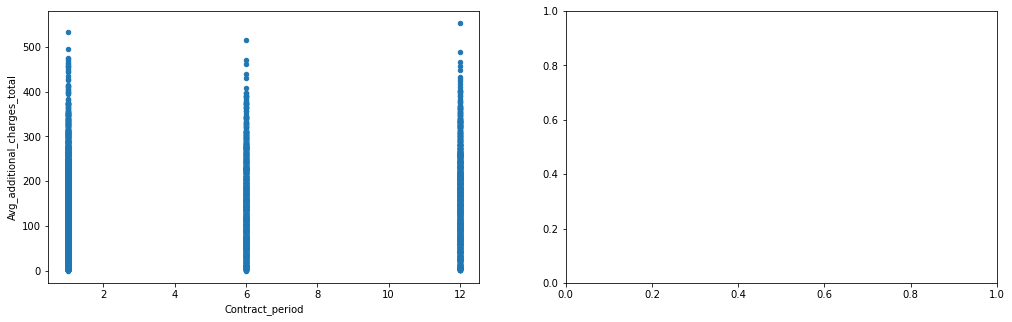

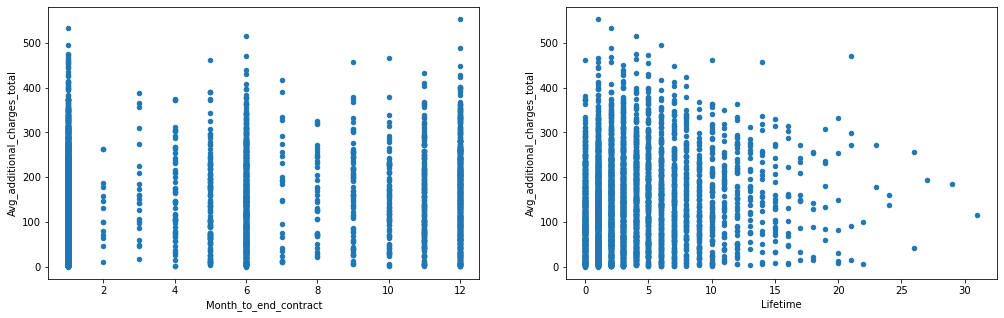

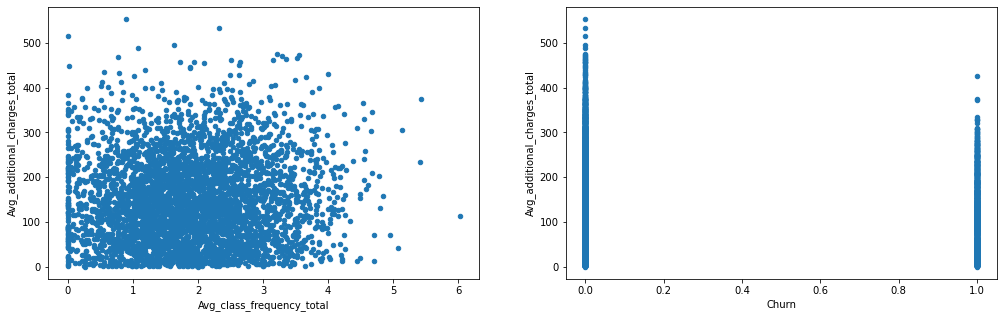

In [132]:
rcParams['figure.figsize'] = 17,5

fig, ax = plt.subplots(nrows=1, ncols=2)
df[['Avg_additional_charges_total', 'Contract_period']].plot(kind='scatter', 
                                                 x='Contract_period', 
                                                 y='Avg_additional_charges_total', 
                                                 ax=ax[0])
fig.show()

fig, ax = plt.subplots(nrows=1, ncols=2)
df[['Avg_additional_charges_total', 'Month_to_end_contract']].plot(kind='scatter', 
                                                 x='Month_to_end_contract', 
                                                 y='Avg_additional_charges_total', 
                                                 ax=ax[0])
df[['Avg_additional_charges_total', 'Lifetime']].plot(kind='scatter', 
                                                 x='Lifetime', 
                                                 y='Avg_additional_charges_total', 
                                                 ax=ax[1])
fig.show()

fig, ax = plt.subplots(nrows=1, ncols=2)
df[['Avg_additional_charges_total', 'Avg_class_frequency_total']].plot(kind='scatter', 
                                                 x='Avg_class_frequency_total', 
                                                 y='Avg_additional_charges_total', 
                                                 ax=ax[0])
df[['Avg_additional_charges_total', 'Churn']].plot(kind='scatter', 
                                                 x='Churn', 
                                                 y='Avg_additional_charges_total', 
                                                 ax=ax[1])
fig.show()

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* распределение прибыли от прочих услуг фитнес-центра по продолжительности абонементов - выводов нет.
    
    
* распределение прибыли от прочих услуг фитнес-центра по количеству месяцев до окончания действия абонемента - можно предположить, что в первый месяц после покупки абонемента выручка от клиентов выше, затем постепенно снижается. Т.е. первый месяц клиент актвнее ходит на фитнес и тратит деньги на прочие услуги. Далее активность клиента постепенно снижается и снижаются его траты.
    
    
* распределение прибыли от прочих услуг фитнес-центра по времени жизни - новые клиенты чаще пользуются прочими услугами. И среди клиентов с Lifetime менее года чаще встречаются те, кто больше тратит на прочие услуги.
    
    
* распределение прибыли от прочих услуг фитнес-центра по средней посещаемости - большинство клиентов, которые пользуются прочими услугами имеют показатель средней посещаемости 0.5-3.5 дней в неделю. Пользователи, которые посещают фитнес-центр в сренем свыше 4 раз в недели очень редко пользуются прочими услугами.
    
    
* распределение прибыли от прочих услуг фитнес-центра по факту оттока - среди клиентов, которые больше всего тратят на прочие услуги (400+) практически нет "отвалившихся".



***Визуализация взаимосвязей по переменной Contract_period.***

<ipython-input-133-a7359a5a80fc>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-133-a7359a5a80fc>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


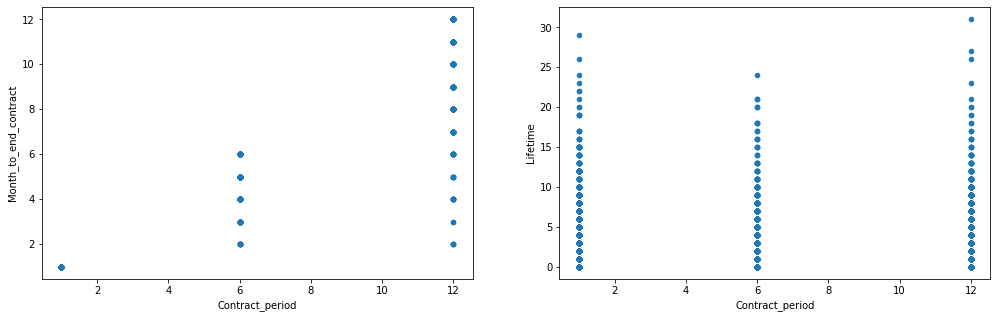

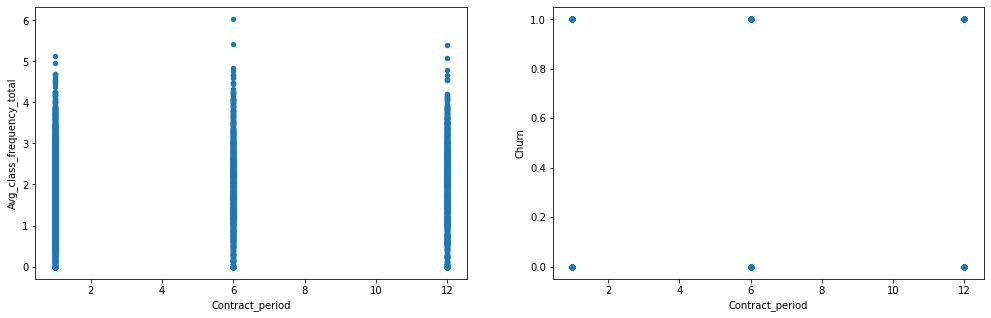

In [133]:
rcParams['figure.figsize'] = 17,5

fig, ax = plt.subplots(nrows=1, ncols=2)
df[['Contract_period', 'Month_to_end_contract']].plot(kind='scatter', 
                                                 x='Contract_period', 
                                                 y='Month_to_end_contract', 
                                                 ax=ax[0])
df[['Contract_period', 'Lifetime']].plot(kind='scatter', 
                                                 x='Contract_period', 
                                                 y='Lifetime', 
                                                 ax=ax[1])
fig.show()

fig, ax = plt.subplots(nrows=1, ncols=2)
df[['Contract_period', 'Avg_class_frequency_total']].plot(kind='scatter', 
                                                 x='Contract_period', 
                                                 y='Avg_class_frequency_total', 
                                                 ax=ax[0])
df[['Contract_period', 'Churn']].plot(kind='scatter', 
                                                 x='Contract_period', 
                                                 y='Churn', 
                                                 ax=ax[1])
fig.show()

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* взаимосвязь продолжительности абонементов и времени жизни клиента - среди клиентов, которые берут абонементы на 1, 12 мес. есть более высокие показатели lifetime в сравнении с клиентами, которые берут абонемент на 6 мес. Но таких клиентов вцелом не много.

***Визуализация взаимосвязей по переменной Month_to_end_contract.***

<ipython-input-134-88d37ae406b0>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-134-88d37ae406b0>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


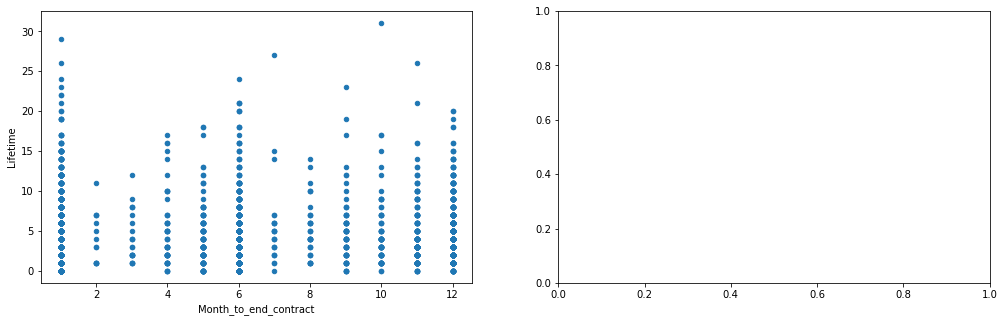

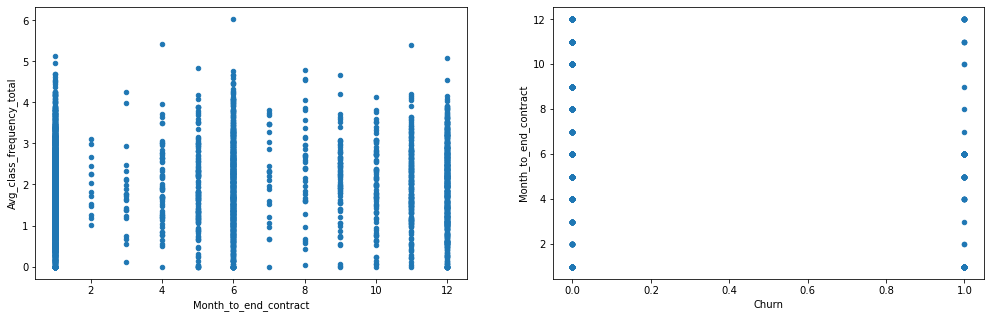

In [134]:
rcParams['figure.figsize'] = 17,5

fig, ax = plt.subplots(nrows=1, ncols=2)
df[['Month_to_end_contract', 'Lifetime']].plot(kind='scatter', 
                                                 x='Month_to_end_contract', 
                                                 y='Lifetime', 
                                                 ax=ax[0])
fig.show()

fig, ax = plt.subplots(nrows=1, ncols=2)
df[['Month_to_end_contract', 'Avg_class_frequency_total']].plot(kind='scatter', 
                                                 x='Month_to_end_contract', 
                                                 y='Avg_class_frequency_total', 
                                                 ax=ax[0])
df[['Month_to_end_contract', 'Churn']].plot(kind='scatter', 
                                                 x='Churn', 
                                                 y='Month_to_end_contract', 
                                                 ax=ax[1])
fig.show()

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* взаимосвязь количества месяцев до окончания действия абонемента и времени жизни клиента - по абонементам с показателем Month_to_end_contract <6 мес. и <12 мес. можно сделать вывод, что с уменьшением количества месяцев до окончания действия абонемента показатель Lifetime клиентов снижается. Т.е. клиенты покупают абонементы, первый месяц посещают фитнес-центр. Затем с каждым месяцем часть клиентов отваливается (перегорает).


* взаимосвязь количества месяцев до окончания действия абонемента и средней посещаемости фитнес-центра - в певый месяц клиенты активно ходят на фитнес. Далее средняя посещаемость снижается. В последний месяц посещаемость сильно возрастает, но здесь стоит учитывать, что подавляющее большинство клиентов покупают абонемент всего на месяц.

***Визуализация взаимосвязей по переменной Lifetime.***

<ipython-input-135-33c523300945>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-135-33c523300945>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


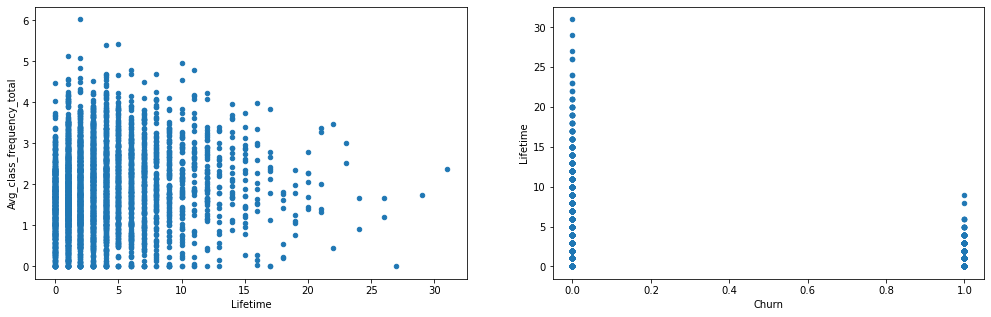

In [135]:
rcParams['figure.figsize'] = 17,5

fig.show()

fig, ax = plt.subplots(nrows=1, ncols=2)
df[['Lifetime', 'Avg_class_frequency_total']].plot(kind='scatter', 
                                                 x='Lifetime', 
                                                 y='Avg_class_frequency_total', 
                                                 ax=ax[0])
df[['Lifetime', 'Churn']].plot(kind='scatter', 
                                                 x='Churn', 
                                                 y='Lifetime', 
                                                 ax=ax[1])
fig.show()

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* взаимосвязь времени жизни клиента и средней посещаемости фитнес-центра - посещаемость выше у новых клиентов, т.е. среди новичков больше клиентов, которые часто посещают фитнес центр.


* взаимосвязь времени жизни клиента и факта оттока - отток наблюдается среди клинтов в Lifetime до 10мес. Скореее всего, часть новых клиентов тестируют фитнес-центр, понимают, что их что-то не устраивает (сам фитнес, фитнес-центр, время, местоположение, инструктора и т.д.) и уходят. Другая часть новых клиентов, просто перегорают, либо намеренно приходят на краткий период (например, подтянуть фигуру перед каким-то событием или летним сезоном) Т.е., если клиент посещает фитнес-центр 10+ месяцев, то он переходит в разрад постоянных и вероятность его оттока сильно снижается.

***Стат.проверка гипотез на равенство средних в разрезе переменной gender.***

***Выполним стат.проверку гипотез на равенство средних значений по переменным:***

- 'Age',
- 'Avg_additional_charges_total', 
- 'Month_to_end_contract',
- 'Lifetime',
- 'Avg_class_frequency_total',
- 'Avg_class_frequency_current_month' 

***в разрезе данных по полу клиентов. И ответим на вопросы:***

- есть ли значимая разница в среднем возрасте для клиентов разного пола?
- есть ли значимая разница в средней сумме трат на прочие услуги для для клиентов разного пола?
- есть ли значимая разница в среднем количестве месяцев до окончания действия абонемента для клиентов разного пола?
- есть ли значимая разница в среднем Lifetime для клиентов разного пола?
- есть ли значимая разница в средней общей посещаемости для клиентов разного пола?
- есть ли значимая разница в средней посещаемости за последний месяц для клиентов разного пола?

***Поскольку в данном тесте цена ошибки не велика, зададим пороговый уровень статистической значимости alpha = 0.05.***

***Будем проводить двухвыборочный двухсторонний тест, поскольку у нас есть две независимые выборки.***

In [136]:
df_ = df[['Age',
    'Avg_additional_charges_total', 
    'Month_to_end_contract',
    'Lifetime',
    'Avg_class_frequency_total',
    'Avg_class_frequency_current_month']]

for col in df_.columns:
    print(colored('Cформулируем нулевую и альтернативную гипотезы для данных по столбцу '+col+':', attrs=['bold']))
    print()
    print('H0: средний '+col+' для клиентов разного пола совпадает')
    print('H1: средний '+col+' для клиентов разного пола НЕ совпадает')
    print()
    
    churn_1 = df[col].loc[df['gender'] == 1]
    churn_0 = df[col].loc[df['gender'] == 0]
    
    result = st.ttest_ind(churn_1, churn_0, equal_var=False)
    print(result)
    print()

    if (result.pvalue < alpha):
        print(colored('Отвергаем нулевую гипотезу.', attrs=['bold']))
    else:
        print(colored('Не отвергаем нулевую гипотезу ', attrs=['bold']))
    print('--------------------------------------------------------------------------------------------------------')
    print()

Cформулируем нулевую и альтернативную гипотезы для данных по столбцу Age:

H0: средний Age для клиентов разного пола совпадает
H1: средний Age для клиентов разного пола НЕ совпадает

Ttest_indResult(statistic=0.8733548334342964, pvalue=0.3825221899209419)

Не отвергаем нулевую гипотезу 
--------------------------------------------------------------------------------------------------------

Cформулируем нулевую и альтернативную гипотезы для данных по столбцу Avg_additional_charges_total:

H0: средний Avg_additional_charges_total для клиентов разного пола совпадает
H1: средний Avg_additional_charges_total для клиентов разного пола НЕ совпадает

Ttest_indResult(statistic=-0.5897638868986291, pvalue=0.5553824992802002)

Не отвергаем нулевую гипотезу 
--------------------------------------------------------------------------------------------------------

Cформулируем нулевую и альтернативную гипотезы для данных по столбцу Month_to_end_contract:

H0: средний Month_to_end_contract для клиен

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

- есть ли значимая разница в среднем возрасте для клиентов разного пола?
    - положительное и низкое абсолютное значение t-статистики (statistic=0.8733548334342964) говорит, что средний возраст клиентов с gender=1 чуть выше.
    - но, значение p-value > значения alpha говорит, что значимой разницы в среднем возрасте нет.
    
    
- есть ли значимая разница в средней сумме трат на прочие услуги для для клиентов разного пола?
    - отрицательное и низкое абсолютное значение t-статистики говорит, что средние траты на прочие услуги клиентов с gender=1 чуть ниже.
    - но, значение p-value > значения alpha говорит, что значимой разницы в среднем нет.
    
    
- есть ли значимая разница в среднем количестве месяцев до окончания действия абонемента для клиентов разного пола?
    - отрицательное и низкое абсолютное значение t-статистики говорит, что средний период до окончания дейтсвия абонемента у клиентов с gender=1 чуть ниже.
    - но, значение p-value > значения alpha говорит, что значимой разницы в среднем нет.
    
    
    
- есть ли значимая разница в среднем Lifetime для клиентов разного пола?
    - положительное и низкое абсолютное значение t-статистики говорит, что средний Lifetime клиентов с gender=1 чуть выше.
    - но, значение p-value > значения alpha говорит, что значимой разницы в среднем нет.
    
    
- есть ли значимая разница в средней общей посещаемости для клиентов разного пола?
    - положительное и низкое абсолютное значение t-статистики говорит, что средняя общая посещаемость клиентов с gender=1 чуть выше.
    - но, значение p-value > значения alpha говорит, что значимой разницы в среднем нет.
    
    
- есть ли значимая разница в средней посещаемости за последний месяц для клиентов разного пола?
    - положительное и низкое абсолютное значение t-статистики говорит, что средняя общая посещаемость клиентов с gender=1 чуть выше.
    - но, значение p-value > значения alpha говорит, что значимой разницы в среднем нет.

***Дополнительные рассчеты процентных соотношений для категориальных показателей в разрезе переменной gender***

***Дополнительно рассчитаем для категориальных показателей (которые принимают значения 0 и 1) у какого процента клиентов этот показателя = 1 (т.е. у какого процента клиентов этот показатель присутсвует) от общего количества клиентов в разрезе анализируемого показателя.***

***Например, сделаем срез по показателю пола (gender). Далее в рамках этого среза вычислим:***
    
* для тех у кого gender=1 - какой процент из этого количества клиентов имеет показатель Near_Location=1 или Churn=1 и т.д.
* для тех у кого gender=0 - какой процент из этого количества клиентов имеет показатель Near_Location=1 или Churn=1 и т.д.
    
    

***Т.о. срез по gender и расчет процента по Churn покажет, как много (в % отношении) отваливается мужчин и как много отваливается женщин.***

In [137]:
df.gender.value_counts()

1    2041
0    1959
Name: gender, dtype: int64

In [138]:
df_ = df[['gender', 
          'Near_Location', 
          'Partner', 
          'Promo_friends',  
          'Group_visits', 
          'Churn']]

col_name = 'gender'

sum_ = df_.groupby(col_name).sum()

count_ = df_.groupby(col_name).count()

percent = count_

for col in sum_.columns:
    for i in sum_.index:
        percent.loc[i, col] = round(sum_[col][i]/count_[col][i]*100, 2)
    percent.rename(columns = {col: col+', %'}, inplace = True)
    
percent

,"Near_Location, %","Partner, %","Promo_friends, %","Group_visits, %","Churn, %"
gender,,,,,
0,84.28,49.21,31.09,40.33,26.49
1,84.76,48.16,30.62,42.09,26.56


<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

- среди клиентов с gender=1 чуть больше (на 1,7%) посещают групповые занятия.
    
    
- по другим категориальным показателям в % отношении перевеса в одну из сторон не наблюдается.

***Стат.проверка гипотез на равенство средних в разрезе переменной Near_Location.***

***Выполним стат.проверку гипотез на равенство средних значений по переменным:***

- 'Age',
- 'Avg_additional_charges_total', 
- 'Month_to_end_contract',
- 'Lifetime',
- 'Avg_class_frequency_total',
- 'Avg_class_frequency_current_month' 

***в разрезе данных по проживанию клиента в районе нахождения фитнес-центра. И ответим на вопросы:***

- есть ли значимая разница в среднем возрасте клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра?
- есть ли значимая разница в средней сумме трат на прочие услуги для клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра?
- есть ли значимая разница в среднем количестве месяцев до окончания действия абонемента для клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра?
- есть ли значимая разница в среднем Lifetime для клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра?
- есть ли значимая разница в средней общей посещаемости для клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра?
- есть ли значимая разница в средней посещаемости за последний месяц для клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра?

***Поскольку в данном тесте цена ошибки не велика, зададим пороговый уровень статистической значимости alpha = 0.05.***

***Будем проводить двухвыборочный двухсторонний тест, поскольку у нас есть две независимые выборки.***

In [139]:
df_ = df[['Age',
    'Avg_additional_charges_total', 
    'Month_to_end_contract',
    'Lifetime',
    'Avg_class_frequency_total',
    'Avg_class_frequency_current_month']]

for col in df_.columns:
    print(colored('Cформулируем нулевую и альтернативную гипотезы для данных по столбцу '+col+':', attrs=['bold']))
    print()
    print('H0: средний '+col+' для клиентов проживающих/не проживающих в районе фитнес-центра совпадает')
    print('H1: средний '+col+' для клиентов проживающих/не проживающих в районе фитнес-центра НЕ совпадает')
    print()
    
    churn_1 = df[col].loc[df['Near_Location'] == 1]
    churn_0 = df[col].loc[df['Near_Location'] == 0]
    
    result = st.ttest_ind(churn_1, churn_0, equal_var=False)
    print(result)
    print()

    if (result.pvalue < alpha):
        print(colored('Отвергаем нулевую гипотезу.', attrs=['bold']))
    else:
        print(colored('Не отвергаем нулевую гипотезу.', attrs=['bold']))
    print('--------------------------------------------------------------------------------------------------------')
    print()

Cформулируем нулевую и альтернативную гипотезы для данных по столбцу Age:

H0: средний Age для клиентов проживающих/не проживающих в районе фитнес-центра совпадает
H1: средний Age для клиентов проживающих/не проживающих в районе фитнес-центра НЕ совпадает

Ttest_indResult(statistic=3.7123862064683517, pvalue=0.00021848751324156663)

Отвергаем нулевую гипотезу.
--------------------------------------------------------------------------------------------------------

Cформулируем нулевую и альтернативную гипотезы для данных по столбцу Avg_additional_charges_total:

H0: средний Avg_additional_charges_total для клиентов проживающих/не проживающих в районе фитнес-центра совпадает
H1: средний Avg_additional_charges_total для клиентов проживающих/не проживающих в районе фитнес-центра НЕ совпадает

Ttest_indResult(statistic=2.5630838206826922, pvalue=0.010544760885713472)

Отвергаем нулевую гипотезу.
-----------------------------------------------------------------------------------------------

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

- есть ли значимая разница в среднем возрасте клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра?
    - да, средний возраст клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что средний возраст клиентов, которые живут в районе фитнес-центра чуть выше.
    
    
- есть ли значимая разница в средней сумме трат на прочие услуги для клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра?
    - да, средний траты на прочие услуги клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что средний траты на прочие услуги клиентов, которые живут в районе фитнес-центра чуть выше. Т.е. склонны больше пользоваться прочими услугами.
    
    
- есть ли значимая разница в среднем количестве месяцев до окончания действия абонемента для клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра?
    - да, среднее количество месяцев до окончания действия абонемента клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что среднее количество месяцев до окончания действия абонемента клиентов, которые живут в районе фитнес-центра выше. Т.е. они чаще покупают абонементы на более длительный период.
    
    
- есть ли значимая разница в среднем Lifetime для клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра?
    - да, средний Lifetime клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что средний Lifetime клиентов, которые живут в районе фитнес-центра чуть выше. Т.е. они более постоянны и более привязаны к данному фитнес-центру.
    
    
- есть ли значимая разница в средней общей посещаемости для клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра?
    - да, средняя общая посещаемость клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что средняя общая посещаемость клиентов, которые живут в районе фитнес-центра чуть выше. Скорее всего посещаемость выше по причине того, что им проще добираться до фитнес-центра. Либо они изначально планировали частые посещения и выбирали фитнес-центр по близости.
    
    
- есть ли значимая разница в средней посещаемости за последний месяц для клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра?
    - да, средняя посещаемость за последний месяц клиентов в зависимости от того, проживают ли они (или не проживают) в районе нахождения фитнес-центра различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что средняя посещаемость за последний месяц клиентов, которые живут в районе фитнес-центра чуть выше.

***Дополнительные рассчеты процентных соотношений для категориальных показателей в разрезе переменной Near_Location***

In [140]:
df.Near_Location.value_counts()

1    3381
0     619
Name: Near_Location, dtype: int64

In [141]:
df_ = df[['gender', 
          'Near_Location', 
          'Partner', 
          'Promo_friends',  
          'Group_visits', 
          'Churn']]

col_name = 'Near_Location'

sum_ = df_.groupby(col_name).sum()

count_ = df_.groupby(col_name).count()

percent = count_

for col in sum_.columns:
    for i in sum_.index:
        percent.loc[i, col] = round(sum_[col][i]/count_[col][i]*100, 2)
    percent.rename(columns = {col: col+', %'}, inplace = True)
    
percent

,"gender, %","Partner, %","Promo_friends, %","Group_visits, %","Churn, %"
Near_Location,,,,,
0,50.24,49.27,8.08,23.42,39.74
1,51.17,48.57,35.02,44.48,24.11


<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* Near_Location=1 - количество клиентов, проживаюющих близко от фитнес-центра в разы больше; чуть больше генерят прибыли от прочих услуг, хотя количественно их в разы больше; показывают чуть выше среднюю посещаемость.
    
    
* Near_Location=0 - среди этих клиентов меньше отвалившихся (поскольку ср.арифметическое по Churn(Churn м.б. = 1|0) не намного выше при том, что количественно клиентов, проживаюющих вдали от фитнес-центра в разы меньше)
    
    
Т.е. большая часть клиентов проживает в районе фитнес-центра (что закономерно). Но среди этих клиентов гораздо чаще фиксируется факт оттока.

***Стат.проверка гипотез на равенство средних в разрезе переменной Partner.***

***Выполним стат.проверку гипотез на равенство средних значений по переменным:***

- 'Age',
- 'Avg_additional_charges_total', 
- 'Month_to_end_contract',
- 'Lifetime',
- 'Avg_class_frequency_total',
- 'Avg_class_frequency_current_month' 

***в разрезе данных по тому, является ли клиент сотрудником компании пратнера фитнес-центра. И ответим на вопросы:***

- есть ли значимая разница в среднем возрасте для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра?
- есть ли значимая разница в средней сумме трат на прочие услуги для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра?
- есть ли значимая разница в среднем количестве месяцев до окончания действия абонемента для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра?
- есть ли значимая разница в среднем Lifetime для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра?
- есть ли значимая разница в средней общей посещаемости для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра?
- есть ли значимая разница в средней посещаемости за последний месяц для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра?

***Поскольку в данном тесте цена ошибки не велика, зададим пороговый уровень статистической значимости alpha = 0.05.***

***Будем проводить двухвыборочный двухсторонний тест, поскольку у нас есть две независимые выборки.***

In [142]:
df_ = df[['Age',
    'Avg_additional_charges_total', 
    'Month_to_end_contract',
    'Lifetime',
    'Avg_class_frequency_total',
    'Avg_class_frequency_current_month']]

for col in df_.columns:
    print(colored('Cформулируем нулевую и альтернативную гипотезы для данных по столбцу '+col+':', attrs=['bold']))
    print()
    print('H0: средний '+col+' для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра совпадает')
    print('H1: средний '+col+' для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра НЕ совпадает')
    print()
    
    churn_1 = df[col].loc[df['Partner'] == 1]
    churn_0 = df[col].loc[df['Partner'] == 0]
    
    result = st.ttest_ind(churn_1, churn_0, equal_var=False)
    print(result)
    print()

    if (result.pvalue < alpha):
        print(colored('Отвергаем нулевую гипотезу.', attrs=['bold']))
    else:
        print(colored('Не отвергаем нулевую гипотезу ', attrs=['bold']))
    print('--------------------------------------------------------------------------------------------------------')
    print()

Cформулируем нулевую и альтернативную гипотезы для данных по столбцу Age:

H0: средний Age для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра совпадает
H1: средний Age для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра НЕ совпадает

Ttest_indResult(statistic=3.009351420496608, pvalue=0.0026343970814725055)

Отвергаем нулевую гипотезу.
--------------------------------------------------------------------------------------------------------

Cформулируем нулевую и альтернативную гипотезы для данных по столбцу Avg_additional_charges_total:

H0: средний Avg_additional_charges_total для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра совпадает
H1: средний Avg_additional_charges_total для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра НЕ совпадает

Ttest_indResult(statistic=1.4496321948368285, pvalue=0.1472401449469446)

Не отвергаем нулевую гипотезу 
----------------

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

- **есть ли значимая разница в среднем возрасте для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра?**
    - да, средний возраст для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что средний возраст для клиентов являющихся сотрудниками компании пратнера фитнес-центра чуть выше. Т.е. сотрудники компаний партнеров - это более взрослая аудитория.
    
    
- **есть ли значимая разница в средней сумме трат на прочие услуги для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра?**
    - нет, статистически значимой разницы нет.
    
    
- **есть ли значимая разница в среднем количестве месяцев до окончания действия абонемента для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра?**
    - да, среднее количество месяцев до окончания действия абонемента для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что среднее количество месяцев до окончания действия абонемента для клиентов являющихся сотрудниками компании пратнера фитнес-центра выше. Т.е. сотрудники компаний партнеров чаще приобретают продолжительные абонементы.
    
    
- **есть ли значимая разница в среднем Lifetime для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра?**
    - да, среднее Lifetime для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что среднее Lifetime для клиентов являющихся сотрудниками компании пратнера фитнес-центра чуть выше. Т.е. сотрудники компаний партнеров более постоянны, что объяснимо - обычно для сотрудников компаний партнеров есть льготы либо мотиватором может выступать то, что коллеги тоже посещают фитнес-центр и не хочется отставать.
    
    
- **есть ли значимая разница в средней общей посещаемости для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра?**
    - нет, статистически значимой разницы нет.
    
    
- **есть ли значимая разница в средней посещаемости за последний месяц для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра?**
    - да, средняя посещаемость в последний месяц для клиентов являющихся/не являющихся сотрудниками компании пратнера фитнес-центра различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что средняя посещаемость в последний месяц для клиентов являющихся сотрудниками компании пратнера фитнес-центра чуть выше. Т.е. сотрудники компаний партнеров именно в последний месяц действия абонемента начинают активнее посещать фитнес-центр. Возможно, это свзязано с тем, что "жаба душит" - это клиенты, которые купили месячный абонемент со скидкой по промо-коду и стараются использовать его по максимуму. Либо для сотрудников действуют льготы/скидки, которые скорают (или больше не предоставляются), если предыдущий абонемент редко использовался.

***Дополнительные рассчеты процентных соотношений для категориальных показателей в разрезе переменной Partner***

In [143]:
df.Partner.value_counts()

0    2053
1    1947
Name: Partner, dtype: int64

In [144]:
df_ = df[['gender', 
          'Near_Location', 
          'Partner', 
          'Promo_friends',  
          'Group_visits', 
          'Churn']]

col_name = 'Partner'

sum_ = df_.groupby(col_name).sum()

count_ = df_.groupby(col_name).count()

percent = count_

for col in sum_.columns:
    for i in sum_.index:
        percent.loc[i, col] = round(sum_[col][i]/count_[col][i]*100, 2)
    percent.rename(columns = {col: col+', %'}, inplace = True)
    
percent

,"gender, %","Near_Location, %","Promo_friends, %","Group_visits, %","Churn, %"
Partner,,,,,
0,51.53,84.71,10.52,40.14,33.32
1,50.49,84.33,52.29,42.37,19.36


<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* Partner=1 - среди клиентов сотрудников компаний партнеров больше тех, которые пришли по промо-коду (т.е. внутри компаний партнеров фитнес-центра часто те, кто посещает фитнес-центр предлагают свом коллегам воспользоваться также посещать фитнес-центр и раздают промокоды); сотрудники компаний-партнеров чаще берут абонементы сроком действия более месяца; в среднем чуть более взрослая аудитория; генерят чуть больше прибыли от прочих услуг; имеют чуть более продолжительное время жизни; в среднем чуть более часто посещают фитнес-центр.
    
    
* Partner=0 - среди клиентов НЕ сотрудников компаний партнеров больше отвалившихся (поскольку ср.арифметическое по показателю Churn (Churn м.д. = 1|0) у НЕ сотрудников выше при том, что среди клиентов фитнес-центра общее количество сотрудников компаний партнеров и НЕ сотрудников приблизительно одинаково).
    
    
Т.е. чаще факт оттока фиксируется среди клиентов НЕ сотрудников компаний партнеров.

***Стат.проверка гипотез на равенство средних в разрезе переменной Promo_friends.***

***Выполним стат.проверку гипотез на равенство средних значений по переменным:***

- 'Age',
- 'Avg_additional_charges_total', 
- 'Month_to_end_contract',
- 'Lifetime',
- 'Avg_class_frequency_total',
- 'Avg_class_frequency_current_month' 

***в разрезе данных по факту первоначальной записи в рамках акции «приведи друга»,. И ответим на вопросы:***

- есть ли значимая разница в среднем возрасте для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента?
- есть ли значимая разница в средней сумме трат на прочие услуги для для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента?
- есть ли значимая разница в среднем количестве месяцев до окончания действия абонемента для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента?
- есть ли значимая разница в среднем Lifetime для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента?
- есть ли значимая разница в средней общей посещаемости для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента?
- есть ли значимая разница в средней посещаемости за последний месяц для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента?

***Поскольку в данном тесте цена ошибки не велика, зададим пороговый уровень статистической значимости alpha = 0.05.***

***Будем проводить двухвыборочный двухсторонний тест, поскольку у нас есть две независимые выборки.***

In [145]:
df_ = df[['Age',
    'Avg_additional_charges_total', 
    'Month_to_end_contract',
    'Lifetime',
    'Avg_class_frequency_total',
    'Avg_class_frequency_current_month']]

for col in df_.columns:
    print(colored('Cформулируем нулевую и альтернативную гипотезы для данных по столбцу '+col+':', attrs=['bold']))
    print()
    print('H0: средний '+col+' для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента совпадает')
    print('H1: средний '+col+' для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента НЕ совпадает')
    print()
    
    churn_1 = df[col].loc[df['Promo_friends'] == 1]
    churn_0 = df[col].loc[df['Promo_friends'] == 0]
    
    result = st.ttest_ind(churn_1, churn_0, equal_var=False)
    print(result)
    print()

    if (result.pvalue < alpha):
        print(colored('Отвергаем нулевую гипотезу.', attrs=['bold']))
    else:
        print(colored('Не отвергаем нулевую гипотезу ', attrs=['bold']))
    print('--------------------------------------------------------------------------------------------------------')
    print()

Cформулируем нулевую и альтернативную гипотезы для данных по столбцу Age:

H0: средний Age для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента совпадает
H1: средний Age для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента НЕ совпадает

Ttest_indResult(statistic=3.221995044656405, pvalue=0.001289650136724031)

Отвергаем нулевую гипотезу.
--------------------------------------------------------------------------------------------------------

Cформулируем нулевую и альтернативную гипотезы для данных по столбцу Avg_additional_charges_total:

H0: средний Avg_additional_charges_total для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента совпадает
H1: средний Avg_additional_charges_total для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента НЕ совпадает

Ttest_indResult(statistic=2.3361250416620707, pvalue=0.019

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

- **есть ли значимая разница в среднем возрасте для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента?**
    - да, средний возраст для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что средний возраст для клиентов использовавших промо-код от знакомого при оплате первого абонемента чуть выше. Т.е. клиенты, которые использовали промо-код обычно чуть старше.
    
    
- **есть ли значимая разница в средней сумме трат на прочие услуги для для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента?**
    - да, средние траты на прочие услуги для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что средние траты на прочие услуги для клиентов использовавших промо-код от знакомого при оплате первого абонемента чуть выше.
    
    
- **есть ли значимая разница в среднем количестве месяцев до окончания действия абонемента для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента?**
    - нет, статистически значимой разницы нет.
    
    
- **есть ли значимая разница в среднем Lifetime для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента?**
    - да, средний Lifetime для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что средний Lifetime для клиентов использовавших промо-код от знакомого при оплате первого абонемента чуть выше. Т.е. клиенты, которые использовали промо-код обычно продолжительнее пользуются услугами фитнес-центра.
    
    
- **есть ли значимая разница в средней общей посещаемости для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента?**
    - нет, статистически значимой разницы нет.
    
    
- **есть ли значимая разница в средней посещаемости за последний месяц для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента?**
    - да, средняя посещаемость за последний месяц для клиентов использовавших/не использовавших промо-код от знакомого при оплате первого абонемента различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что средняя посещаемость за последний месяц для клиентов использовавших промо-код от знакомого при оплате первого абонемента чуть выше. Т.е. клиенты, которые использовали промо-код обычно активизируются именно в последний месяц действия абонемента. Либо - это клиенты, которые купили месячный абонемент со скидкой по промо-коду и стараются использовать его по максимуму.

***Дополнительные рассчеты процентных соотношений для категориальных показателей в разрезе переменной Promo_friends***

In [146]:
df.Promo_friends.value_counts()

0    2766
1    1234
Name: Promo_friends, dtype: int64

In [147]:
df_ = df[['gender', 
          'Near_Location', 
          'Partner', 
          'Promo_friends',  
          'Group_visits', 
          'Churn']]

col_name = 'Promo_friends'

sum_ = df_.groupby(col_name).sum()

count_ = df_.groupby(col_name).count()

percent = count_

for col in sum_.columns:
    for i in sum_.index:
        percent.loc[i, col] = round(sum_[col][i]/count_[col][i]*100, 2)
    percent.rename(columns = {col: col+', %'}, inplace = True)
    
percent

,"gender, %","Near_Location, %","Partner, %","Group_visits, %","Churn, %"
Promo_friends,,,,,
0,51.19,79.43,33.59,37.27,31.31
1,50.65,95.95,82.50,50.08,15.80


<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* Promo_friends=1 - больше покупают абонементы на 6,12мес.; чуть более взрослая аудитория; чуть больше генерят выручки от прочих услуг, хотя количественно клиентов с Promo_friends=1 в 2 раза меньше; имеют больший Lifetime и среднюю посещаемость.
    
    
* Promo_friends=0 - больше с gender=1; больше проживающих вблизи фитнес-центра; больше посещают групповые занятия; чаще отваливаются.
    
    
Т.е. большая часть клиентов фитнес-центра не использует промокод Promo_friends. Но среди этих клиентов гораздо чаще фиксируется факт оттока.

***Стат.проверка гипотез на равенство средних в разрезе переменной Group_visits.***

***Выполним стат.проверку гипотез на равенство средних значений по переменным:***

- 'Age',
- 'Avg_additional_charges_total', 
- 'Month_to_end_contract',
- 'Lifetime',
- 'Avg_class_frequency_total',
- 'Avg_class_frequency_current_month' 

***в разрезе данных по факту посещения групповых занятий. И ответим на вопросы:***

- есть ли значимая разница в среднем возрасте для клиентов посещающих/не посещающих групповые занятия?
- есть ли значимая разница в средней сумме трат на прочие услуги для клиентов посещающих/не посещающих групповые занятия?
- есть ли значимая разница в среднем количестве месяцев до окончания действия абонемента для клиентов посещающих/не посещающих групповые занятия?
- есть ли значимая разница в среднем Lifetime для клиентов посещающих/не посещающих групповые занятия?
- есть ли значимая разница в средней общей посещаемости для клиентов посещающих/не посещающих групповые занятия?
- есть ли значимая разница в средней посещаемости за последний месяц для клиентов посещающих/не посещающих групповые занятия?

***Поскольку в данном тесте цена ошибки не велика, зададим пороговый уровень статистической значимости alpha = 0.05.***

***Будем проводить двухвыборочный двухсторонний тест, поскольку у нас есть две независимые выборки.***

In [148]:
df_ = df[['Age',
    'Avg_additional_charges_total', 
    'Month_to_end_contract',
    'Lifetime',
    'Avg_class_frequency_total',
    'Avg_class_frequency_current_month']]

for col in df_.columns:
    print(colored('Cформулируем нулевую и альтернативную гипотезы для данных по столбцу '+col+':', attrs=['bold']))
    print()
    print('H0: средний '+col+' для клиентов посещающих/не посещающих групповые занятия совпадает')
    print('H1: средний '+col+' для клиентов посещающих/не посещающих групповые занятия НЕ совпадает')
    print()
    
    churn_1 = df[col].loc[df['Group_visits'] == 1]
    churn_0 = df[col].loc[df['Group_visits'] == 0]
    
    result = st.ttest_ind(churn_1, churn_0, equal_var=False)
    print(result)
    print()

    if (result.pvalue < alpha):
        print(colored('Отвергаем нулевую гипотезу.', attrs=['bold']))
    else:
        print(colored('Не отвергаем нулевую гипотезу ', attrs=['bold']))
    print('--------------------------------------------------------------------------------------------------------')
    print()

Cформулируем нулевую и альтернативную гипотезы для данных по столбцу Age:

H0: средний Age для клиентов посещающих/не посещающих групповые занятия совпадает
H1: средний Age для клиентов посещающих/не посещающих групповые занятия НЕ совпадает

Ttest_indResult(statistic=5.116626496693557, pvalue=3.277619685592952e-07)

Отвергаем нулевую гипотезу.
--------------------------------------------------------------------------------------------------------

Cформулируем нулевую и альтернативную гипотезы для данных по столбцу Avg_additional_charges_total:

H0: средний Avg_additional_charges_total для клиентов посещающих/не посещающих групповые занятия совпадает
H1: средний Avg_additional_charges_total для клиентов посещающих/не посещающих групповые занятия НЕ совпадает

Ttest_indResult(statistic=2.017580124418272, pvalue=0.043711801373630954)

Отвергаем нулевую гипотезу.
--------------------------------------------------------------------------------------------------------

Cформулируем нулевую

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

- **есть ли значимая разница в среднем возрасте для клиентов посещающих/не посещающих групповые занятия?**
    - да, средний возраст клиентов посещающих/не посещающих групповые занятия различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что средний возраст клиентов посещающих групповые занятия чуть выше. Т.е. клиенты, которые посещают групповые занятия обычно чуть старше.
    
    
- **есть ли значимая разница в средней сумме трат на прочие услуги для клиентов посещающих/не посещающих групповые занятия?**
    - да, средние траты на прочие услуги клиентов посещающих/не посещающих групповые занятия различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что средние траты на прочие услуги клиентов посещающих групповые занятия чуть выше.
    
    
- **есть ли значимая разница в среднем количестве месяцев до окончания действия абонемента для клиентов посещающих/не посещающих групповые занятия?**
    - да, среднее количество месяцев до окончания абонемента клиентов посещающих/не посещающих групповые занятия различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что среднее количество месяцев до окончания абонемента выше. Т.е. клиенты, которые посещают групповые занятия обычно чаще приобретают абонементы 6,12 мес.
    
    
- **есть ли значимая разница в среднем Lifetime для клиентов посещающих/не посещающих групповые занятия?**
    - да, средний Lifetime клиентов посещающих/не посещающих групповые занятия различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что средний Lifetime клиентов посещающих групповые занятия чуть выше.
    
    
- **есть ли значимая разница в средней общей посещаемости для клиентов посещающих/не посещающих групповые занятия?**
    - да, средняя общая посещаемость клиентов посещающих/не посещающих групповые занятия различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что средняя общая посещаемость клиентов посещающих групповые занятия чуть выше.
    
    
- **есть ли значимая разница в средней посещаемости за последний месяц для клиентов посещающих/не посещающих групповые занятия?**
    - да, средняя посещаемость в последний месяц клиентов посещающих/не посещающих групповые занятия различается. По полученному положительному и не высокому абсолютному значению t-статистики можно сделать вывод, что средняя посещаемость в последний месяц клиентов посещающих групповые занятия чуть выше. Возможно, сами групповые занятия проходят достаточно часто, или клиенты посещают разные групповые занятия и не пропускают, поскольку мотиватором выступает сама группа от которой не хочется отставать. Либо это клиенты, которые посещают групповые занятия в дополнение к фитнесу, за счет чего посещаемость вырастает.
    
    

***Дополнительные рассчеты процентных соотношений для категориальных показателей в разрезе переменной Group_visits***

In [149]:
df.Group_visits.value_counts()

0    2351
1    1649
Name: Group_visits, dtype: int64

In [150]:
df_ = df[['gender', 
          'Near_Location', 
          'Partner', 
          'Promo_friends',  
          'Group_visits', 
          'Churn']]

col_name = 'Group_visits'

sum_ = df_.groupby(col_name).sum()

count_ = df_.groupby(col_name).count()

percent = count_

for col in sum_.columns:
    for i in sum_.index:
        percent.loc[i, col] = round(sum_[col][i]/count_[col][i]*100, 2)
    percent.rename(columns = {col: col+', %'}, inplace = True)
    
percent

,"gender, %","Near_Location, %","Partner, %","Promo_friends, %","Churn, %"
Group_visits,,,,,
0,50.28,79.84,47.72,26.20,33.01
1,52.09,91.21,50.03,37.48,17.28


<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* Group_visits=1 - чаще это клиенты сотрудники компаний партнеров; чаще покупают абонемент на 6,12 мес.; чуть более взрослая аудитория; чуть больше генерят выручки от прочих услуг, хотя количественно клиентов с Group_visits=1 в 1,5 раза меньше; имеют больший Lifetime и среднюю посещаемость.
    
    
* Group_visits=0 - среди этих клиентов больше отвалившихся.
    
    
Т.е. большая часть клиентов фитнес-центра не посещает групповые занятия. И среди этих клиентов гораздо чаще фиксируется факт оттока.

# Построение моделей


## Построение моделей классификации: 
(модель прогноза оттока в следующем месяце)


***Для начала используем модель логистической регрессии LogisticRegression(), поскольку независимые переменные (признаки, по которым будем прогнозировать факто оттока клиента), часто являются категориальными. В такой ситуации использовать модель LDA смысла нет - она будет показывать неверный прогноз.***

In [152]:
# Разделяем данные на независимые переменные (df_data), по которым будет прогнозировать факт оттока клиента 
# и зависимую переменную (df_churn), которую будем прогнозировать.
df_data = df[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]

df_churn = df['Churn'].to_numpy()

In [153]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data, df_churn, test_size=0.25)

In [154]:
# Импортируем класс GridSearchCV для реализации перебора параметров модели
from sklearn.model_selection import GridSearchCV

In [155]:
# Создаем словарь параметров и соответствующих им значений для алгоритма логистической регрессии.
# Некоторые параметры отключим (будут использоваться значения по умолчанию), чтоб рассчеты не занимали очень много времени.
grid_param = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'dual': [True, False],
#     'tol': [0.0001], #default
    'C': np.arange(0.1, 1.1, 0.1), 
#     'fit_intercept': [True, False], #default
#     'intercept_scaling': [1], #default
#     'class_weight': ['None'], #default
#     'random_state': ['None'], #default
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
#     'max_iter': [100], #default
#     'multi_class': ['auto'], #default
#     'verbose': [0], #default
#     'warm_start': [True, False] #default
#     'n_jobs': [-1], #default
#     'l1_ratio': ['none'] #default
}

In [156]:
# Создаем экземпляр класса GridSearchCV.
# Передаем в него название модели (LogisticRegression), словарь с праметрами модели (param_grid), 
# название метрики качества модели (scoring), количеству сгибов (cv) и значение используемой вычислительной мощности (n_jobs).
from sklearn.linear_model import LogisticRegression

grid = GridSearchCV(LogisticRegression(),
                     param_grid=grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)

In [157]:
# Вызываем метод fit класса GridSearchCV и передаем в него выборку для обучения.
grid.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'dual': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             scoring='f1')

In [158]:
# Выводим значение максимальной точности метрики качества модели, из тех, что были получены в процессе перебора параметров модели
grid.best_score_

0.8571812779769103

In [159]:
# Выводим значения параметров, при которых модель показала наивысшую точность.
grid.best_params_

{'C': 0.1, 'dual': False, 'penalty': 'none', 'solver': 'newton-cg'}

In [160]:
# импортируем функционал логистической регресссии и передаем в нее значения параметров, 
# при которых была достигнута максимальная точность у метрики качества модели.

# model = LogisticRegression(dual=gr_lr.best_params_['dual'], 
#                         C=gr_lr.best_params_['C'], 
#                         penalty=gr_lr.best_params_['penalty'], 
#                         solver=gr_lr.best_params_['solver'])

model = LogisticRegression(**grid.best_params_)

In [161]:
# обучаем модель на тренировочной выборке
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=0.1, penalty='none', solver='newton-cg')

In [162]:
# делаем прогноз на тестовой выборке
model.predict(X_test)

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [163]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, model.predict(X_test)]).T

result.head()

,0,1
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0


In [164]:
# Выведем точность модели, для оценки ее качества
from sklearn.metrics import f1_score

f1_score(y_test, model.predict(X_test))

0.8880455407969641

In [165]:
# Выводим коэффициенты
model.coef_

array([[ 0.00935148, -0.17070294, -0.33184516, -0.46795554,  0.24099832,
        -0.12017688, -0.70291297, -0.3572388 , -0.00571742, -0.18687913,
        -1.05283703,  4.1091678 , -4.86908091]])

По аналогии протестируем еще несколько моделей и выявим лучшую.

In [166]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

grid_param = {
    'priors': [None], #default
    'reg_param': np.arange(0.0, 1, 0.01), # не defaul, но маленький интервал значений
    'store_covariance': [True, False],
    'tol': np.arange(0.0000, 0.001, 0.0001) # не defaul, но маленький интервал значений
}

grid = GridSearchCV(QuadraticDiscriminantAnalysis(),
                     param_grid=grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)

grid.fit(X_train, y_train)

# Вместо дополнительного импорта функционала модели:
# model = AdaBoostClassifier(**grid.best_params_)
# и повторного обучения модели:
# model.fit(X_train, y_train)
# model.predict(X_test)
# f1_score(y_test, model.predict(X_test))
# используем вызов метода predict у GridSearchCV, 
# который сам по себе будет использовать лучшие полученные параметры.

f1_score(y_test, grid.predict(X_test))

0.8542713567839195

In [167]:
from sklearn.ensemble import RandomForestClassifier

grid_param = {
    'n_estimators': [100, 300, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(31, 33, 1),
#     'min_samples_split': [2],
#     'min_samples_leaf': [1],
#     'min_weight_fraction_leaf': [0.0],
    'max_features': ['auto', 'sqrt', 'log2'],
#     'max_leaf_nodes': [None],
#     'min_impurity_decrease': [0.0],
#     'min_impurity_split': [None],
    'bootstrap': [True, False],
    'oob_score': [True, False],
#     'n_jobs': [-1],
#     'random_state': [None],
#     'verbose': [0],
#     'warm_start': [True, False]
    'class_weight': ['balanced', 'balanced_subsample']
#     'ccp_alpha': [0.0],
#     'max_samples': [None]
}

grid = GridSearchCV(RandomForestClassifier(),
                     param_grid=grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)

grid.fit(X_train, y_train)

f1_score(y_test, grid.predict(X_test))

0.8249027237354086

In [168]:
from sklearn.ensemble import AdaBoostClassifier

grid_param = {
    'base_estimator': [None],
    'n_estimators': [50, 100, 300, 500, 800, 1000],
    'learning_rate': [1],
    'algorithm': ['SAMME', 'SAMME.R'],
    'random_state': [None]
}

grid = GridSearchCV(AdaBoostClassifier(),
                     param_grid=grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)

grid.fit(X_train, y_train)

f1_score(y_test, grid.predict(X_test))

0.846441947565543

In [169]:
from sklearn.ensemble import GradientBoostingClassifier

grid_param = {
    'loss': ['deviance', 'exponential'],
    'n_estimators': [100, 300, 500, 800, 1000]
#     'criterion': ['friedman_mse', 'mse', 'mae'],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'warm_start': [True, False]
}

grid = GridSearchCV(GradientBoostingClassifier(),
                     param_grid=grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)

grid.fit(X_train, y_train)

f1_score(y_test, grid.predict(X_test))

0.9087523277467413

<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* наибольшую точность (f1_score=0.9087523277467413, т.е.90.88%) показала модель GradientBoostingClassifier.

## Построение моделей кластеризации: 
(модель кластеризации клиентов на группы)

In [170]:
# Выделим в отдельный набор данных cl непрерывные признаки клиентов
cl= df[['Age', 
        'Avg_additional_charges_total', 
        'Contract_period',
        'Month_to_end_contract', 
        'Lifetime', 
        'Avg_class_frequency_total', 
        'Avg_class_frequency_current_month',
        'Churn']]

In [171]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [172]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(cl[['Age', 
                                    'Avg_additional_charges_total',  
                                    'Contract_period', 
                                    'Month_to_end_contract', 
                                    'Lifetime', 
                                    'Avg_class_frequency_total', 
                                    'Avg_class_frequency_current_month']])

In [173]:
X_scaled

array([[-0.0565538 , -1.37753121,  0.28989014, ..., -0.19332863,
        -1.91191971, -1.67847198],
       [ 0.55732732, -0.35021325,  1.60882159, ...,  0.87368001,
         0.04517569,  0.1360137 ],
       [-0.36349436, -0.1815923 , -0.8092194 , ..., -0.46008079,
        -0.02049263, -0.02901851],
       ...,
       [-0.36349436, -0.71300239,  1.60882159, ..., -0.46008079,
         0.93313947,  1.01103141],
       [ 0.86426788, -0.88258181,  0.28989014, ..., -0.19332863,
        -0.25604937, -0.16225246],
       [ 0.25038676,  0.33129445,  1.60882159, ..., -0.72683295,
        -0.79947418, -0.69509885]])

In [174]:
from sklearn.cluster import KMeans

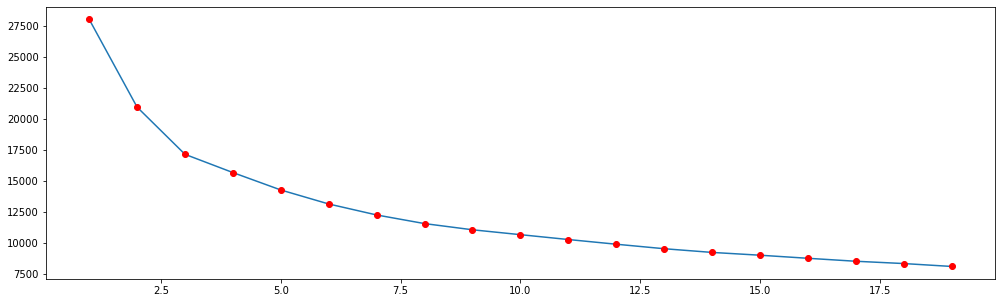

In [175]:
# строим график локтя для X_scaled

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [176]:
# явно указываем количество кластеров исходя из графика локтя
kmeans = KMeans(n_clusters=3)

# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)

# добавим в cl_churn_1 столбец с номером кластера для каждого клиента
cl['Cluster'] = clusters

cl

<ipython-input-176-744c47e9e36e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl['Cluster'] = clusters


,Age,Avg_additional_charges_total,Contract_period,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,Cluster
0,29,14.227470,6,5,3,0.020398,0.000000,0,1
1,31,113.202938,12,12,7,1.922936,1.910244,0,0
2,28,129.448479,1,1,2,1.859098,1.736502,0,1
3,33,62.669863,12,12,2,3.205633,3.357215,0,0
4,26,198.362265,1,1,3,1.113884,1.120078,0,1
...,...,...,...,...,...,...,...,...,...
3995,33,2.406023,12,12,8,2.284497,2.349070,0,0
3996,29,68.883764,1,1,1,1.277168,0.292859,1,1
3997,28,78.250542,12,11,2,2.786146,2.831439,0,0
3998,32,61.912657,6,5,3,1.630108,1.596237,0,1


In [177]:
# считаем средние значения признаков по каждому кластеру
cl[['Age', 
    'Avg_additional_charges_total',  
    'Contract_period', 
    'Month_to_end_contract', 
    'Lifetime', 
    'Avg_class_frequency_total', 
    'Avg_class_frequency_current_month',
    'Cluster']].groupby('Cluster').mean()

,Age,Avg_additional_charges_total,Contract_period,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Cluster,,,,,,,
0,29.872081,165.821294,11.780711,10.712690,4.795939,1.970918,1.963657
1,28.130011,128.340433,2.068156,1.973654,2.317297,1.224648,0.978390
2,30.100867,157.886950,2.765957,2.594957,4.829787,2.708029,2.699555


<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* Cluster=0 - клиентов из данного кластера отличает то, что они в среднем чуть старше. Также у них максимальный Lifetime и мксимальная средняя посещаемость.


* Cluster=1 - клиентов из данного кластера отличает то, что они в среднем имеют минимальный возраст, приобретают абонементы на минимальный период и меньше всего пользуются прочими услагами фитнес-центра. Также у них минимальный Lifetime и средняя посещаемость.


* Cluster=2 - клиентов из данного кластера отличает то, что они приобретают абонементы на длительный период и в среднем больше всего тратят на прочие услуги фитнес-центра. Также у них довольно высокий Lifetime (почти, как у клиентов с Cluster=0), но средняя посещаемость ниже чем у клиентов из Cluster=0.

Проанализируем признаки клиентов в разрезе полученных кластеров и попытаемся понять есть ли принципиальная разница в оттоке в разных кластерах. Далее определим кластера, в которых зафиксировано больше всего фактов оттока и меньше всего фактов оттока. Затем проанализируем признаки клиентов в рамках кластеров с максимальным и минимальным показателем оттока и попытаемся выявить разницу в характеристиках.

In [178]:
# посчитаем среденее значение оттока по каждому кластеру
cl[['Churn', 'Cluster']].groupby('Cluster').mean()

,Churn
Cluster,
0,0.023350
1,0.534937
2,0.081954


<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* Cluster=1 показываем максимальное значение оттока = 53.4097%
    
    
* Cluster=2 показываем минимальное значение оттока = 2.3469%

In [179]:
# считаем средние значения признаков d разрезе 1 и 2 кластеров
cl_meam = cl.loc[cl['Cluster'] > 0].drop(['Churn'], axis=1).groupby('Cluster').mean()

cl_meam

,Age,Avg_additional_charges_total,Contract_period,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Cluster,,,,,,,
1,28.130011,128.340433,2.068156,1.973654,2.317297,1.224648,0.978390
2,30.100867,157.886950,2.765957,2.594957,4.829787,2.708029,2.699555


<font color="Brown"><font size="4"><strong><em><u>Вывод:</u></em></strong></font></font>

* Cluster=1 - средний возраст чуть ниже. Заметно меньше период действия купленного абонемента, показатель Lifetime и средняя посещаемость. Причем средняя посещаемость в последний месяц по отношению к средней посещаемость за весь период снижается больше, чем аналогичное соотношение средней посещаемости у клиентов из Cluster=2
    
    
* Cluster=2 - средний возраст чуть выше. Заметно выше период действия купленного абонемента, показатель Lifetime и средняя посещаемость.
    
    
    
Т.е. для относительно новых клиентов (Lifetime<2.5 мес), которые покупают абонементы с минимальным периодом действия и посещают фитнес-центр в среднем около 1.2 раза в неделю и меньше характерен высокий показатель оттока (53.4097%, т.е. больше половины).